# Libraries

In [1]:
import os
import pandas as pd

import geopandas as gpd
from geopandas.tools import sjoin


import rtree

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


import folium
from folium.plugins import MarkerCluster

import shapely
from shapely.geometry import Point

import unicodedata

import pysal
from pysal.esda import mapclassify

import datetime as dt

import numpy as np
from numpy import array
from numpy import hstack

from sklearn.model_selection import train_test_split

# We'll be using the Tensorflow backend (default).
import tensorflow as tf

import theano.tensor as T


from keras import backend as K    #RNN LSTM NOT WORK WITHOUT THIS
from keras.models import model_from_json
from keras.models import Model
from keras.layers import Input, Dense

import logging

import jgraph

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler


import math
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import LSTM
from keras.layers.recurrent import LSTM
from keras.layers import RNN, SimpleRNN
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.layers.core import Activation
from keras.callbacks import LambdaCallback

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely 

# weather data "weather"

In [2]:
weather = pd.read_csv("./weather.csv")
del weather['High Sea Level Press (in)']
del weather['Avg Sea Level Press (in)']
del weather['Low Sea Level Press (in)']
del weather['Avg Temp (F)']
del weather['Avg Dew Point (F)']
del weather['Avg Humidity (%)']
del weather['Avg Visibility (mi)']

weather2018 = weather[weather.Year == 2018]
weather2018 = weather2018[weather2018.Month != 4]
weather2018 = weather2018.reset_index(drop=True)
weather2018.head(weather2018.shape[0])

df = pd.DataFrame(weather2018)

line = pd.DataFrame({ "Year": 2018, "Month": 3, "Day": 21, "High Temp (F)": 39, "Low Temp (F)": 32, "High Dew Point (F)": 28, "Low Dew Point (F)": 22, "High Humidity (%)": 78, "Low Humidity (%)": 61, "High Visibility (mi)": 10, "Low Visibility (mi)": 10, "High Wind (mph)": 25, "Avg Wind (mph)": 8, "High Wind Gust (mph)": 28, "Snowfall (in)": 0.00, "Precip (in)": 0.00, "Events": None}, index=[78])
df2 = pd.concat([df.ix[:78], line, df.ix[79:]]).reset_index(drop=True)

weather2018 = df2

df = pd.DataFrame(weather2018)

line = pd.DataFrame({ "Year": 2018, "Month": 3, "Day": 22, "High Temp (F)": 42, "Low Temp (F)": 32, "High Dew Point (F)": 35, "Low Dew Point (F)": 34, "High Humidity (%)": 96, "Low Humidity (%)": 73, "High Visibility (mi)": 10, "Low Visibility (mi)": 1, "High Wind (mph)": 30, "Avg Wind (mph)": 5, "High Wind Gust (mph)": 32, "Snowfall (in)": 0.09, "Precip (in)": 0.09, "Events": 'Both'}, index=[79])
df2 = pd.concat([df.ix[:79], line, df.ix[80:]]).reset_index(drop=True)

weather2018 = df2

weather2017 = weather[weather.Year == 2017]
weather2017 = weather2017.reset_index(drop=True)

weather2016 = weather[weather.Year == 2016]
weather2016 = weather2016.reset_index(drop=True)

weather1617 = weather2016.append(weather2017)
weather1617 = weather1617.reset_index(drop=True)
weather161718 = weather1617.append(weather2018)
weather161718 = weather161718.reset_index(drop=True)


#weather161718.head(weather161718.shape[0])

weather = weather161718

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


# bike data "bikes"

# 2016

In [3]:
dataset201601 = pd.read_csv("./2016/201601.csv")
dataset201601 = dataset201601[dataset201601['tripduration'] < 86400]
dataset201601 = dataset201601[['starttime','stoptime']]
dataset201601['starttime'] = dataset201601['starttime'].str[:10]
dataset201601['stoptime'] = dataset201601['stoptime'].str[:10]
dataset201601['freq'] = dataset201601.groupby('starttime')['starttime'].transform('count')
dataset201601 = dataset201601.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201601 = dataset201601.reset_index(drop=True)
del dataset201601['stoptime']
#dataset201601.insert( 0,'index', 1)

dataset201602 = pd.read_csv("./2016/201602.csv")
dataset201602 = dataset201602[dataset201602['tripduration'] < 86400]
dataset201602 = dataset201602[['starttime','stoptime']]
dataset201602['starttime'] = dataset201602['starttime'].str[:10]
dataset201602['stoptime'] = dataset201602['stoptime'].str[:10]
dataset201602['freq'] = dataset201602.groupby('starttime')['starttime'].transform('count')
dataset201602 = dataset201602.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201602 = dataset201602.reset_index(drop=True)
del dataset201602['stoptime']
#dataset201602.insert( 0,'index', 1)

dataset201603 = pd.read_csv("./2016/201603.csv")
dataset201603 = dataset201603[dataset201603['tripduration'] < 86400]
dataset201603 = dataset201603[['starttime','stoptime']]
dataset201603['starttime'] = dataset201603['starttime'].str[:10]
dataset201603['stoptime'] = dataset201603['stoptime'].str[:10]
dataset201603['freq'] = dataset201603.groupby('starttime')['starttime'].transform('count')
dataset201603 = dataset201603.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201603 = dataset201603.reset_index(drop=True)
del dataset201603['stoptime']
#dataset201603.insert( 0,'index', 1)

dataset201604 = pd.read_csv("./2016/201604.csv")
dataset201604 = dataset201604[dataset201604['tripduration'] < 86400]
dataset201604 = dataset201604[['starttime','stoptime']]
dataset201604['starttime'] = dataset201604['starttime'].str[:10]
dataset201604['stoptime'] = dataset201604['stoptime'].str[:10]
dataset201604['freq'] = dataset201604.groupby('starttime')['starttime'].transform('count')
dataset201604 = dataset201604.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201604 = dataset201604.reset_index(drop=True)
del dataset201604['stoptime']
#dataset201604.insert( 0,'index', 1)

dataset201605 = pd.read_csv("./2016/201605.csv")
dataset201605 = dataset201605[dataset201605['tripduration'] < 86400]
dataset201605 = dataset201605[['starttime','stoptime']]
dataset201605['starttime'] = dataset201605['starttime'].str[:10]
dataset201605['stoptime'] = dataset201605['stoptime'].str[:10]
dataset201605['freq'] = dataset201605.groupby('starttime')['starttime'].transform('count')
dataset201605 = dataset201605.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201605 = dataset201605.reset_index(drop=True)
del dataset201605['stoptime']
#dataset201605.insert( 0,'index', 1)

dataset201606 = pd.read_csv("./2016/201606.csv")
dataset201606 = dataset201606[dataset201606['tripduration'] < 86400]
dataset201606 = dataset201606[['starttime','stoptime']]
dataset201606['starttime'] = dataset201606['starttime'].str[:10]
dataset201606['stoptime'] = dataset201606['stoptime'].str[:10]
dataset201606['freq'] = dataset201606.groupby('starttime')['starttime'].transform('count')
dataset201606 = dataset201606.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201606 = dataset201606.reset_index(drop=True)
del dataset201606['stoptime']
#dataset201606.insert( 0,'index', 1)

dataset201607 = pd.read_csv("./2016/201607.csv")
dataset201607 = dataset201607[dataset201607['tripduration'] < 86400]
dataset201607 = dataset201607[['starttime','stoptime']]
dataset201607['starttime'] = dataset201607['starttime'].str[:10]
dataset201607['stoptime'] = dataset201607['stoptime'].str[:10]
dataset201607['freq'] = dataset201607.groupby('starttime')['starttime'].transform('count')
dataset201607 = dataset201607.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201607 = dataset201607.reset_index(drop=True)
del dataset201607['stoptime']
#dataset201607.insert( 0,'index', 1)

dataset201608 = pd.read_csv("./2016/201608.csv")
dataset201608 = dataset201608[dataset201608['tripduration'] < 86400]
dataset201608 = dataset201608[['starttime','stoptime']]
dataset201608['starttime'] = dataset201608['starttime'].str[:10]
dataset201608['stoptime'] = dataset201608['stoptime'].str[:10]
dataset201608['freq'] = dataset201608.groupby('starttime')['starttime'].transform('count')
dataset201608 = dataset201608.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201608 = dataset201608.reset_index(drop=True)
del dataset201608['stoptime']
#dataset201608.insert( 0,'index', 1)

dataset201609 = pd.read_csv("./2016/201609.csv")
dataset201609 = dataset201609[dataset201609['tripduration'] < 86400]
dataset201609 = dataset201609[['starttime','stoptime']]
dataset201609['starttime'] = dataset201609['starttime'].str[:10]
dataset201609['stoptime'] = dataset201609['stoptime'].str[:10]
dataset201609['freq'] = dataset201609.groupby('starttime')['starttime'].transform('count')
dataset201609 = dataset201609.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201609 = dataset201609.reset_index(drop=True)
del dataset201609['stoptime']
#dataset201609.insert( 0,'index', 1)

dataset201610 = pd.read_csv("./2016/201610.csv")
dataset201610 = dataset201610[dataset201610['tripduration'] < 86400]
dataset201610 = dataset201610[['starttime','stoptime']]
dataset201610['starttime'] = dataset201610['starttime'].str[:10]
dataset201610['stoptime'] = dataset201610['stoptime'].str[:10]
dataset201610['freq'] = dataset201610.groupby('starttime')['starttime'].transform('count')
dataset201610 = dataset201610.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201610 = dataset201610.reset_index(drop=True)
del dataset201610['stoptime']
#dataset201610.insert( 0,'index', 1)

dataset201611 = pd.read_csv("./2016/201611.csv")
dataset201611 = dataset201611[dataset201611['tripduration'] < 86400]
dataset201611 = dataset201611[['starttime','stoptime']]
dataset201611['starttime'] = dataset201611['starttime'].str[:10]
dataset201611['stoptime'] = dataset201611['stoptime'].str[:10]
dataset201611['freq'] = dataset201611.groupby('starttime')['starttime'].transform('count')
dataset201611 = dataset201611.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201611 = dataset201611.reset_index(drop=True)
del dataset201611['stoptime']
#dataset201611.insert( 0,'index', 1)

dataset201612 = pd.read_csv("./2016/201612.csv")
dataset201612 = dataset201612[dataset201612['tripduration'] < 86400]
dataset201612 = dataset201612[['starttime','stoptime']]
dataset201612['starttime'] = dataset201612['starttime'].str[:10]
dataset201612['stoptime'] = dataset201612['stoptime'].str[:10]
dataset201612['freq'] = dataset201612.groupby('starttime')['starttime'].transform('count')
dataset201612 = dataset201612.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201612 = dataset201612.reset_index(drop=True)
del dataset201612['stoptime']
#dataset201612.insert( 0,'index', 1)

# 2017

In [4]:
dataset201701 = pd.read_csv("./2017/201701.csv")
dataset201701 = dataset201701[dataset201701['tripduration'] < 86400]
dataset201701 = dataset201701[['starttime','stoptime']]
dataset201701['starttime'] = dataset201701['starttime'].str[:10]
dataset201701['stoptime'] = dataset201701['stoptime'].str[:10]
dataset201701['freq'] = dataset201701.groupby('starttime')['starttime'].transform('count')
dataset201701 = dataset201701.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201701 = dataset201701.reset_index(drop=True)
del dataset201701['stoptime']
#dataset201701.insert( 0,'index', 1)

dataset201702 = pd.read_csv("./2017/201702.csv")
dataset201702 = dataset201702[dataset201702['tripduration'] < 86400]
dataset201702 = dataset201702[['starttime','stoptime']]
dataset201702['starttime'] = dataset201702['starttime'].str[:10]
dataset201702['stoptime'] = dataset201702['stoptime'].str[:10]
dataset201702['freq'] = dataset201702.groupby('starttime')['starttime'].transform('count')
dataset201702 = dataset201702.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201702 = dataset201702.reset_index(drop=True)
del dataset201702['stoptime']
#dataset201702.insert( 0,'index', 1)

dataset201703 = pd.read_csv("./2017/201703.csv")
dataset201703 = dataset201703[dataset201703['tripduration'] < 86400]
dataset201703 = dataset201703[['starttime','stoptime']]
dataset201703['starttime'] = dataset201703['starttime'].str[:10]
dataset201703['stoptime'] = dataset201703['stoptime'].str[:10]
dataset201703['freq'] = dataset201703.groupby('starttime')['starttime'].transform('count')
dataset201703 = dataset201703.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201703 = dataset201703.reset_index(drop=True)
del dataset201703['stoptime']
#dataset201703.insert( 0,'index', 1)

dataset201704 = pd.read_csv("./2017/201704.csv")
dataset201704 = dataset201704[dataset201704['tripduration'] < 86400]
dataset201704 = dataset201704[['starttime','stoptime']]
dataset201704['starttime'] = dataset201704['starttime'].str[:10]
dataset201704['stoptime'] = dataset201704['stoptime'].str[:10]
dataset201704['freq'] = dataset201704.groupby('starttime')['starttime'].transform('count')
dataset201704 = dataset201704.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201704 = dataset201704.reset_index(drop=True)
del dataset201704['stoptime']
#dataset201704.insert( 0,'index', 1)

dataset201705 = pd.read_csv("./2017/201705.csv")
dataset201705 = dataset201705[dataset201705['tripduration'] < 86400]
dataset201705 = dataset201705[['starttime','stoptime']]
dataset201705['starttime'] = dataset201705['starttime'].str[:10]
dataset201705['stoptime'] = dataset201705['stoptime'].str[:10]
dataset201705['freq'] = dataset201705.groupby('starttime')['starttime'].transform('count')
dataset201705 = dataset201705.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201705 = dataset201705.reset_index(drop=True)
del dataset201705['stoptime']
#dataset201705.insert( 0,'index', 1)

dataset201706 = pd.read_csv("./2017/201706.csv")
dataset201706 = dataset201706[dataset201706['tripduration'] < 86400]
dataset201706 = dataset201706[['starttime','stoptime']]
dataset201706['starttime'] = dataset201706['starttime'].str[:10]
dataset201706['stoptime'] = dataset201706['stoptime'].str[:10]
dataset201706['freq'] = dataset201706.groupby('starttime')['starttime'].transform('count')
dataset201706 = dataset201706.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201706 = dataset201706.reset_index(drop=True)
del dataset201706['stoptime']
#dataset201706.insert( 0,'index', 1)

dataset201707 = pd.read_csv("./2017/201707.csv")
dataset201707 = dataset201707[dataset201707['tripduration'] < 86400]
dataset201707 = dataset201707[['starttime','stoptime']]
dataset201707['starttime'] = dataset201707['starttime'].str[:10]
dataset201707['stoptime'] = dataset201707['stoptime'].str[:10]
dataset201707['freq'] = dataset201707.groupby('starttime')['starttime'].transform('count')
dataset201707 = dataset201707.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201707 = dataset201707.reset_index(drop=True)
del dataset201707['stoptime']
#dataset201707.insert( 0,'index', 1)

dataset201708 = pd.read_csv("./2017/201708.csv")
dataset201708 = dataset201708[dataset201708['tripduration'] < 86400]
dataset201708 = dataset201708[['starttime','stoptime']]
dataset201708['starttime'] = dataset201708['starttime'].str[:10]
dataset201708['stoptime'] = dataset201708['stoptime'].str[:10]
dataset201708['freq'] = dataset201708.groupby('starttime')['starttime'].transform('count')
dataset201708 = dataset201708.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201708 = dataset201708.reset_index(drop=True)
del dataset201708['stoptime']
#dataset201708.insert( 0,'index', 1)

dataset201709 = pd.read_csv("./2017/201709.csv")
dataset201709 = dataset201709[dataset201709['tripduration'] < 86400]
dataset201709 = dataset201709[['starttime','stoptime']]
dataset201709['starttime'] = dataset201709['starttime'].str[:10]
dataset201709['stoptime'] = dataset201709['stoptime'].str[:10]
dataset201709['freq'] = dataset201709.groupby('starttime')['starttime'].transform('count')
dataset201709 = dataset201709.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201709 = dataset201709.reset_index(drop=True)
del dataset201709['stoptime']
#dataset201709.insert( 0,'index', 1)

dataset201710 = pd.read_csv("./2017/201710.csv")
dataset201710 = dataset201710[dataset201710['tripduration'] < 86400]
dataset201710 = dataset201710[['starttime','stoptime']]
dataset201710['starttime'] = dataset201710['starttime'].str[:10]
dataset201710['stoptime'] = dataset201710['stoptime'].str[:10]
dataset201710['freq'] = dataset201710.groupby('starttime')['starttime'].transform('count')
dataset201710 = dataset201710.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201710 = dataset201710.reset_index(drop=True)
del dataset201710['stoptime']
#dataset201710.insert( 0,'index', 1)

dataset201711= pd.read_csv("./2017/201711.csv")
dataset201711 = dataset201711[dataset201711['tripduration'] < 86400]
dataset201711 = dataset201711[['starttime','stoptime']]
dataset201711['starttime'] = dataset201711['starttime'].str[:10]
dataset201711['stoptime'] = dataset201711['stoptime'].str[:10]
dataset201711['freq'] = dataset201711.groupby('starttime')['starttime'].transform('count')
dataset201711 = dataset201711.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201711 = dataset201711.reset_index(drop=True)
del dataset201711['stoptime']
#dataset201711.insert( 0,'index', 1)

dataset201712= pd.read_csv("./2017/201712.csv")
dataset201712 = dataset201712[dataset201712['tripduration'] < 86400]
dataset201712 = dataset201712[['starttime','stoptime']]
dataset201712['starttime'] = dataset201712['starttime'].str[:10]
dataset201712['stoptime'] = dataset201712['stoptime'].str[:10]
dataset201712['freq'] = dataset201712.groupby('starttime')['starttime'].transform('count')
dataset201712 = dataset201712.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201712 = dataset201712.reset_index(drop=True)
del dataset201712['stoptime']
#dataset201712.insert( 0,'index', 1)

In [17]:
dataset201701 = pd.read_csv("./2017/201701.csv")
dataset201701 = dataset201701[dataset201701['tripduration'] < 86400]
dataset201701 = dataset201701[dataset201701['start station name'] == 'Rowes Wharf - Atlantic Ave']
dataset201701 = dataset201701[dataset201701['end station name'] == 'Cross St. at Hanover St.']
dataset201701 = dataset201701[['starttime','stoptime']]
dataset201701['starttime'] = dataset201701['starttime'].str[:10]
dataset201701['stoptime'] = dataset201701['stoptime'].str[:10]
dataset201701['freq'] = dataset201701.groupby('starttime')['starttime'].transform('count')
dataset201701 = dataset201701.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201701 = dataset201701.reset_index(drop=True)
del dataset201701['stoptime']
#dataset201701.insert( 0,'index', 1)

dataset201702 = pd.read_csv("./2017/201702.csv")
dataset201702 = dataset201702[dataset201702['tripduration'] < 86400]
dataset201701 = dataset201702[dataset201702['start station name'] == 'Rowes Wharf - Atlantic Ave']
dataset201701 = dataset201702[dataset201702['end station name'] == 'Cross St. at Hanover St.']
dataset201702 = dataset201702[['starttime','stoptime']]
dataset201702['starttime'] = dataset201702['starttime'].str[:10]
dataset201702['stoptime'] = dataset201702['stoptime'].str[:10]
dataset201702['freq'] = dataset201702.groupby('starttime')['starttime'].transform('count')
dataset201702 = dataset201702.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201702 = dataset201702.reset_index(drop=True)
del dataset201702['stoptime']
#dataset201702.insert( 0,'index', 1)

dataset201703 = pd.read_csv("./2017/201703.csv")
dataset201703 = dataset201703[dataset201703['tripduration'] < 86400]
dataset201701 = dataset201703[dataset201703['start station name'] == 'Rowes Wharf - Atlantic Ave']
dataset201701 = dataset201703[dataset201703['end station name'] == 'Cross St. at Hanover St.']
dataset201703 = dataset201703[['starttime','stoptime']]
dataset201703['starttime'] = dataset201703['starttime'].str[:10]
dataset201703['stoptime'] = dataset201703['stoptime'].str[:10]
dataset201703['freq'] = dataset201703.groupby('starttime')['starttime'].transform('count')
dataset201703 = dataset201703.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201703 = dataset201703.reset_index(drop=True)
del dataset201703['stoptime']
#dataset201703.insert( 0,'index', 1)

dataset201704 = pd.read_csv("./2017/201704.csv")
dataset201704 = dataset201704[dataset201704['tripduration'] < 86400]
dataset201701 = dataset201704[dataset201704['start station name'] == 'Rowes Wharf - Atlantic Ave']
dataset201701 = dataset201704[dataset201704['end station name'] == 'Cross St. at Hanover St.']
dataset201704 = dataset201704[['starttime','stoptime']]
dataset201704['starttime'] = dataset201704['starttime'].str[:10]
dataset201704['stoptime'] = dataset201704['stoptime'].str[:10]
dataset201704['freq'] = dataset201704.groupby('starttime')['starttime'].transform('count')
dataset201704 = dataset201704.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201704 = dataset201704.reset_index(drop=True)
del dataset201704['stoptime']
#dataset201704.insert( 0,'index', 1)

dataset201705 = pd.read_csv("./2017/201705.csv")
dataset201705 = dataset201705[dataset201705['tripduration'] < 86400]
dataset201701 = dataset201705[dataset201705['start station name'] == 'Rowes Wharf - Atlantic Ave']
dataset201701 = dataset201705[dataset201705['end station name'] == 'Cross St. at Hanover St.']
dataset201705 = dataset201705[['starttime','stoptime']]
dataset201705['starttime'] = dataset201705['starttime'].str[:10]
dataset201705['stoptime'] = dataset201705['stoptime'].str[:10]
dataset201705['freq'] = dataset201705.groupby('starttime')['starttime'].transform('count')
dataset201705 = dataset201705.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201705 = dataset201705.reset_index(drop=True)
del dataset201705['stoptime']
#dataset201705.insert( 0,'index', 1)

dataset201706 = pd.read_csv("./2017/201706.csv")
dataset201706 = dataset201706[dataset201706['tripduration'] < 86400]
dataset201701 = dataset201706[dataset201706['start station name'] == 'Rowes Wharf - Atlantic Ave']
dataset201701 = dataset201706[dataset201706['end station name'] == 'Cross St. at Hanover St.']
dataset201706 = dataset201706[['starttime','stoptime']]
dataset201706['starttime'] = dataset201706['starttime'].str[:10]
dataset201706['stoptime'] = dataset201706['stoptime'].str[:10]
dataset201706['freq'] = dataset201706.groupby('starttime')['starttime'].transform('count')
dataset201706 = dataset201706.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201706 = dataset201706.reset_index(drop=True)
del dataset201706['stoptime']
#dataset201706.insert( 0,'index', 1)

dataset201707 = pd.read_csv("./2017/201707.csv")
dataset201707 = dataset201707[dataset201707['tripduration'] < 86400]
dataset201701 = dataset201707[dataset201707['start station name'] == 'Rowes Wharf - Atlantic Ave']
dataset201701 = dataset201707[dataset201707['end station name'] == 'Cross St. at Hanover St.']
dataset201707 = dataset201707[['starttime','stoptime']]
dataset201707['starttime'] = dataset201707['starttime'].str[:10]
dataset201707['stoptime'] = dataset201707['stoptime'].str[:10]
dataset201707['freq'] = dataset201707.groupby('starttime')['starttime'].transform('count')
dataset201707 = dataset201707.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201707 = dataset201707.reset_index(drop=True)
del dataset201707['stoptime']
#dataset201707.insert( 0,'index', 1)

dataset201708 = pd.read_csv("./2017/201708.csv")
dataset201708 = dataset201708[dataset201708['tripduration'] < 86400]
dataset201701 = dataset201708[dataset201708['start station name'] == 'Rowes Wharf - Atlantic Ave']
dataset201701 = dataset201708[dataset201708['end station name'] == 'Cross St. at Hanover St.']
dataset201708 = dataset201708[['starttime','stoptime']]
dataset201708['starttime'] = dataset201708['starttime'].str[:10]
dataset201708['stoptime'] = dataset201708['stoptime'].str[:10]
dataset201708['freq'] = dataset201708.groupby('starttime')['starttime'].transform('count')
dataset201708 = dataset201708.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201708 = dataset201708.reset_index(drop=True)
del dataset201708['stoptime']
#dataset201708.insert( 0,'index', 1)

dataset201709 = pd.read_csv("./2017/201709.csv")
dataset201709 = dataset201709[dataset201709['tripduration'] < 86400]
dataset201701 = dataset201709[dataset201709['start station name'] == 'Rowes Wharf - Atlantic Ave']
dataset201701 = dataset201709[dataset201709['end station name'] == 'Cross St. at Hanover St.']
dataset201709 = dataset201709[['starttime','stoptime']]
dataset201709['starttime'] = dataset201709['starttime'].str[:10]
dataset201709['stoptime'] = dataset201709['stoptime'].str[:10]
dataset201709['freq'] = dataset201709.groupby('starttime')['starttime'].transform('count')
dataset201709 = dataset201709.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201709 = dataset201709.reset_index(drop=True)
del dataset201709['stoptime']
#dataset201709.insert( 0,'index', 1)

dataset201710 = pd.read_csv("./2017/201710.csv")
dataset201710 = dataset201710[dataset201710['tripduration'] < 86400]
dataset201701 = dataset201710[dataset201710['start station name'] == 'Rowes Wharf - Atlantic Ave']
dataset201701 = dataset201710[dataset201710['end station name'] == 'Cross St. at Hanover St.']
dataset201710 = dataset201710[['starttime','stoptime']]
dataset201710['starttime'] = dataset201710['starttime'].str[:10]
dataset201710['stoptime'] = dataset201710['stoptime'].str[:10]
dataset201710['freq'] = dataset201710.groupby('starttime')['starttime'].transform('count')
dataset201710 = dataset201710.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201710 = dataset201710.reset_index(drop=True)
del dataset201710['stoptime']
#dataset201710.insert( 0,'index', 1)

dataset201711= pd.read_csv("./2017/201711.csv")
dataset201711 = dataset201711[dataset201711['tripduration'] < 86400]
dataset201701 = dataset201711[dataset201711['start station name'] == 'Rowes Wharf - Atlantic Ave']
dataset201701 = dataset201711[dataset201711['end station name'] == 'Cross St. at Hanover St.']
dataset201711 = dataset201711[['starttime','stoptime']]
dataset201711['starttime'] = dataset201711['starttime'].str[:10]
dataset201711['stoptime'] = dataset201711['stoptime'].str[:10]
dataset201711['freq'] = dataset201711.groupby('starttime')['starttime'].transform('count')
dataset201711 = dataset201711.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201711 = dataset201711.reset_index(drop=True)
del dataset201711['stoptime']
#dataset201711.insert( 0,'index', 1)

dataset201712= pd.read_csv("./2017/201712.csv")
dataset201712 = dataset201712[dataset201712['tripduration'] < 86400]
dataset201701 = dataset201712[dataset201712['start station name'] == 'Rowes Wharf - Atlantic Ave']
dataset201701 = dataset201712[dataset201712['end station name'] == 'Cross St. at Hanover St.']
dataset201712 = dataset201712[['starttime','stoptime']]
dataset201712['starttime'] = dataset201712['starttime'].str[:10]
dataset201712['stoptime'] = dataset201712['stoptime'].str[:10]
dataset201712['freq'] = dataset201712.groupby('starttime')['starttime'].transform('count')
dataset201712 = dataset201712.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201712 = dataset201712.reset_index(drop=True)
del dataset201712['stoptime']
#dataset201712.insert( 0,'index', 1)

# 2018.123

In [5]:
dataset201801 = pd.read_csv("./2018/201801.csv")
dataset201801 = dataset201801[dataset201801['tripduration'] < 86400]
dataset201801 = dataset201801[['starttime','stoptime']]
dataset201801['starttime'] = dataset201801['starttime'].str[:10]
dataset201801['stoptime'] = dataset201801['stoptime'].str[:10]
dataset201801['freq'] = dataset201801.groupby('starttime')['starttime'].transform('count')
dataset201801 = dataset201801.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201801 = dataset201801.reset_index(drop=True)
del dataset201801['stoptime']
#dataset201801.insert( 0,'index', 1)

dataset201802 = pd.read_csv("./2018/201802.csv")
dataset201802 = dataset201802[dataset201802['tripduration'] < 86400]
dataset201802 = dataset201802[['starttime','stoptime']]
dataset201802['starttime'] = dataset201802['starttime'].str[:10]
dataset201802['stoptime'] = dataset201802['stoptime'].str[:10]
dataset201802['freq'] = dataset201802.groupby('starttime')['starttime'].transform('count')
dataset201802 = dataset201802.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201802 = dataset201802.reset_index(drop=True)
del dataset201802['stoptime']
#dataset201802.insert( 0,'index', 1)

dataset201803 = pd.read_csv("./2018/201803.csv")
dataset201803 = dataset201803[dataset201803['tripduration'] < 86400]
dataset201803 = dataset201803[['starttime','stoptime']]
dataset201803['starttime'] = dataset201803['starttime'].str[:10]
dataset201803['stoptime'] = dataset201803['stoptime'].str[:10]
dataset201803['freq'] = dataset201803.groupby('starttime')['starttime'].transform('count')
dataset201803 = dataset201803.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201803 = dataset201803.reset_index(drop=True)
del dataset201803['stoptime']
#dataset201803.insert( 0,'index', 1)

df = pd.DataFrame(dataset201803)

line = pd.DataFrame({ "starttime": '2018-03-13', "freq":0}, index=[11])
df2 = pd.concat([df.ix[:11], line, df.ix[12:]]).reset_index(drop=True)

dataset201803 = df2

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:37: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


# 2016 + 2017 +2018.123

In [6]:
#frames = [dataset201601, dataset201602, dataset201603, dataset201604, dataset201605, dataset201606, dataset201607, dataset201608, dataset201609, dataset201610, dataset201611, dataset201612, dataset201701, dataset201702, dataset201703, dataset201704, dataset201705, dataset201706, dataset201707, dataset201708, dataset201709, dataset201710, dataset201711, dataset201712, dataset201801, dataset201802, dataset201803]

bikes = pd.concat(frames)

bikes = bikes.reset_index(drop=True)

In [18]:
frames = [dataset201701, dataset201702, dataset201703, dataset201704, dataset201705, dataset201706, dataset201707, dataset201708, dataset201709, dataset201710, dataset201711, dataset201712]

bikes = pd.concat(frames)

bikes = bikes.reset_index(drop=True)

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


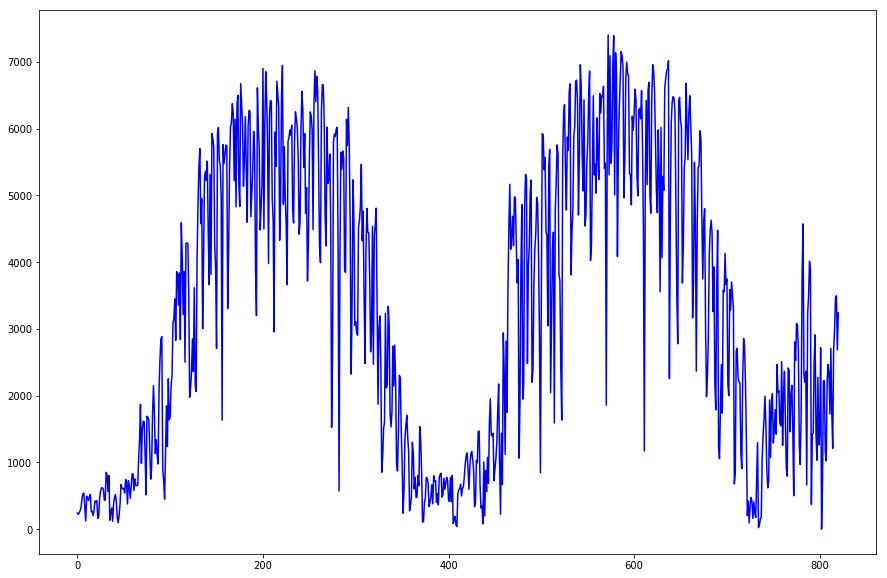

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(array(bikes['freq']).reshape(len(bikes['freq']), 1))
series = pd.DataFrame(scaled)
series.columns = ['freqscaled']
bikes = pd.merge(bikes, series, left_index=True, right_index=True)


bikes.to_csv('C:/Users/Davor/Desktop/Notebooks/bikes.csv')

plt.figure(figsize=(15,10))
plt.plot(bikes['freq'], color='blue')
plt.show()

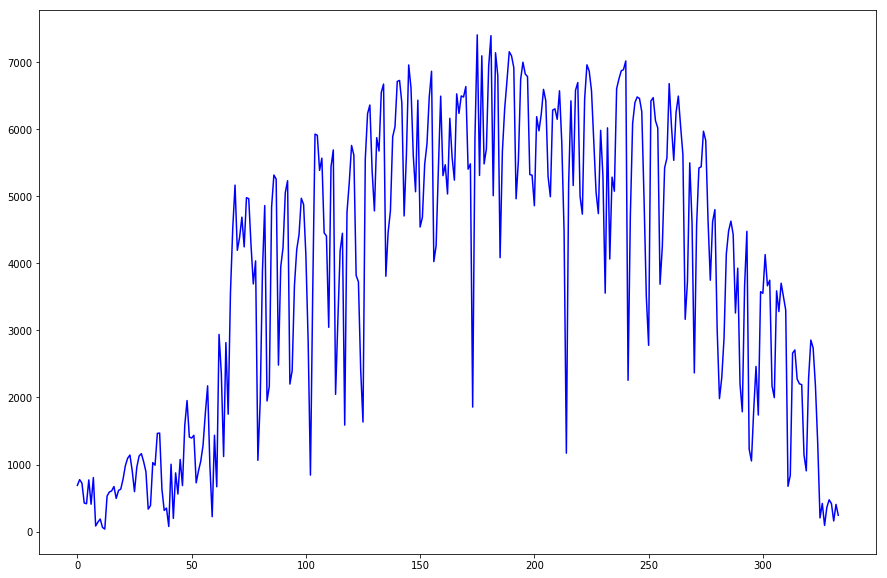

In [19]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(array(bikes['freq']).reshape(len(bikes['freq']), 1))
series = pd.DataFrame(scaled)
series.columns = ['freqscaled']
bikes = pd.merge(bikes, series, left_index=True, right_index=True)


#bikes.to_csv('C:/Users/Davor/Desktop/Notebooks/bikes.csv')

plt.figure(figsize=(15,10))
plt.plot(bikes['freq'], color='blue')
plt.show()

In [8]:
bikes

starttime  freq  freqscaled
0    2016-01-01   241    0.032546
1    2016-01-02   220    0.029710
2    2016-01-03   245    0.033086
3    2016-01-04   276    0.037272
4    2016-01-05   325    0.043889
5    2016-01-06   459    0.061985
6    2016-01-07   533    0.071978
7    2016-01-08   537    0.072519
8    2016-01-09   327    0.044159
9    2016-01-10   121    0.016340
10   2016-01-11   492    0.066442
11   2016-01-12   488    0.065901
12   2016-01-13   426    0.057529
13   2016-01-14   467    0.063065
14   2016-01-15   520    0.070223
15   2016-01-16   260    0.035111
16   2016-01-17   267    0.036057
17   2016-01-18   201    0.027144
18   2016-01-19   292    0.039433
19   2016-01-20   420    0.056718
20   2016-01-21   410    0.055368
21   2016-01-22   425    0.057394
22   2016-01-23   159    0.021472
23   2016-01-24   193    0.026063
24   2016-01-25   463    0.062525
25   2016-01-26   568    0.076705
26   2016-01-27   620    0.083727
27   2016-01-28   617    0.083322
28   2016-01-29   598    0.080756
29   2016-01-30   437    0.059014
..          ...   ...         ...
791  2018-03-02   368    0.049696
792  2018-03-03  1424    0.192302
793  2018-03-04  1439    0.194328
794  2018-03-05  2518    0.340041
795  2018-03-06  2910    0.392978
796  2018-03-07  1424    0.192302
797  2018-03-08  1032    0.139365
798  2018-03-09  2274    0.307090
799  2018-03-10  1261    0.170290
800  2018-03-11  1432    0.193383
801  2018-03-12  2719    0.367184
802  2018-03-13     0    0.000000
803  2018-03-14   713    0.096286
804  2018-03-15  2219    0.299662
805  2018-03-16  2222    0.300068
806  2018-03-17  1157    0.156246
807  2018-03-18  1022    0.138015
808  2018-03-19  2207    0.298042
809  2018-03-20  2466    0.333018
810  2018-03-21  2339    0.315868
811  2018-03-22  1724    0.232816
812  2018-03-23  2707    0.365564
813  2018-03-24  1749    0.236192
814  2018-03-25  1209    0.163268
815  2018-03-26  2689    0.363133
816  2018-03-27  2985    0.403106
817  2018-03-28  3459    0.467117
818  2018-03-29  3496    0.472113
819  2018-03-30  2685    0.362593
820  2018-03-31  3240    0.437542

[821 rows x 3 columns]

# Combined Data "data"

In [162]:
data = pd.concat([bikes, weather], axis=1)


data.to_csv('C:/Users/Davor/Desktop/Notebooks/data.csv')

data = pd.read_csv("./data.csv")


# RNN Simple

In [163]:
data = pd.read_csv("./data.csv")

del data['Unnamed: 0']

data

starttime  freq  freqscaled  Year  Month  Day  High Temp (F)  \
0    2016-01-01   241    0.032546  2016      1    1             41   
1    2016-01-02   220    0.029710  2016      1    2             40   
2    2016-01-03   245    0.033086  2016      1    3             44   
3    2016-01-04   276    0.037272  2016      1    4             36   
4    2016-01-05   325    0.043889  2016      1    5             26   
5    2016-01-06   459    0.061985  2016      1    6             45   
6    2016-01-07   533    0.071978  2016      1    7             43   
7    2016-01-08   537    0.072519  2016      1    8             42   
8    2016-01-09   327    0.044159  2016      1    9             41   
9    2016-01-10   121    0.016340  2016      1   10             58   
10   2016-01-11   492    0.066442  2016      1   11             51   
11   2016-01-12   488    0.065901  2016      1   12             37   
12   2016-01-13   426    0.057529  2016      1   13             33   
13   2016-01-14   467    0.063065  2016      1   14             30   
14   2016-01-15   520    0.070223  2016      1   15             42   
15   2016-01-16   260    0.035111  2016      1   16             43   
16   2016-01-17   267    0.036057  2016      1   17             38   
17   2016-01-18   201    0.027144  2016      1   18             29   
18   2016-01-19   292    0.039433  2016      1   19             25   
19   2016-01-20   420    0.056718  2016      1   20             33   
20   2016-01-21   410    0.055368  2016      1   21             33   
21   2016-01-22   425    0.057394  2016      1   22             32   
22   2016-01-23   159    0.021472  2016      1   23             32   
23   2016-01-24   193    0.026063  2016      1   24             36   
24   2016-01-25   463    0.062525  2016      1   25             35   
25   2016-01-26   568    0.076705  2016      1   26             51   
26   2016-01-27   620    0.083727  2016      1   27             45   
27   2016-01-28   617    0.083322  2016      1   28             42   
28   2016-01-29   598    0.080756  2016      1   29             41   
29   2016-01-30   437    0.059014  2016      1   30             43   
30   2016-01-31   431    0.058204  2016      1   31             57   
31   2016-02-01   851    0.114922  2016      2    1             65   
32   2016-02-02   816    0.110196  2016      2    2             50   
33   2016-02-03   565    0.076300  2016      2    3             57   
34   2016-02-04   801    0.108170  2016      2    4             56   
35   2016-02-05   133    0.017961  2016      2    5             43   
36   2016-02-06   258    0.034841  2016      2    6             35   
37   2016-02-07   316    0.042674  2016      2    7             44   
38   2016-02-08   117    0.015800  2016      2    8             38   
39   2016-02-09   373    0.050371  2016      2    9             29   
40   2016-02-10   473    0.063876  2016      2   10             36   
41   2016-02-11   515    0.069548  2016      2   11             31   
42   2016-02-12   416    0.056178  2016      2   12             24   
43   2016-02-13   171    0.023093  2016      2   13             24   
44   2016-02-14    95    0.012829  2016      2   14             12   
45   2016-02-15   201    0.027144  2016      2   15             35   
46   2016-02-16   380    0.051317  2016      2   16             54   
47   2016-02-17   668    0.090209  2016      2   17             46   
48   2016-02-18   617    0.083322  2016      2   18             35   
49   2016-02-19   605    0.081702  2016      2   19             37   
50   2016-02-20   612    0.082647  2016      2   20             60   
51   2016-02-21   540    0.072924  2016      2   21             54   
52   2016-02-22   745    0.100608  2016      2   22             43   
53   2016-02-23   700    0.094531  2016      2   23             39   
54   2016-02-24   376    0.050777  2016      2   24             57   
55   2016-02-25   724    0.097772  2016      2   25             62   
56   2016-02-26 

In [410]:
datatest = data

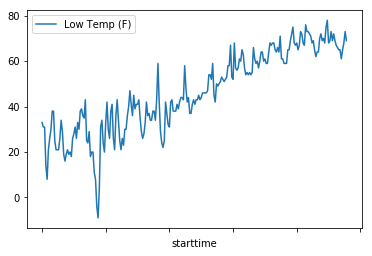

In [411]:
datatest[:24*10].plot(x='starttime', y='Low Temp (F)')

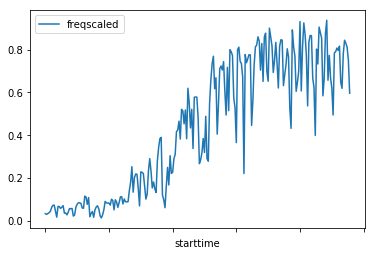

In [412]:
datatest[:24*10].plot(x='starttime', y='freqscaled')

In [413]:
dummy_fields = ['Year', 'Month', 'Day', 'Year']
for each in dummy_fields:
    dummies = pd.get_dummies(datatest[each], prefix=each, drop_first=False)
    datatest = pd.concat([datatest, dummies], axis=1)

fields_to_drop = ['Year', 'Month', 'Day','starttime', 'Events']                # remove freq?
datatest = datatest.drop(fields_to_drop, axis=1)
datatest.head()

freq  freqscaled  High Temp (F)  Low Temp (F)  High Dew Point (F)  \
0   241    0.032546             41            33                  27   
1   220    0.029710             40            31                  21   
2   245    0.033086             44            31                  24   
3   276    0.037272             36            14                  25   
4   325    0.043889             26             8                   4   

   Low Dew Point (F)  High Humidity (%)  Low Humidity (%)  \
0                 18                 70                46   
1                 17                 61                40   
2                 20                 69                43   
3                  2                 72                50   
4                 -5                 58                27   

   High Visibility (mi)  Low Visibility (mi)    ...      Day_25  Day_26  \
0                    10                    8    ...           0       0   
1                    10                   10    ...           0       0   
2                    10                   10    ...           0       0   
3                    10                    2    ...           0       0   
4                    10                   10    ...           0       0   

   Day_27  Day_28  Day_29  Day_30  Day_31  Year_2016  Year_2017  Year_2018  
0       0       0       0       0       0          1          0          0  
1       0       0       0       0       0          1          0          0  
2       0       0       0       0       0          1          0          0  
3       0       0       0       0       0          1          0          0  
4       0       0       0       0       0          1          0          0  

[5 rows x 64 columns]

In [414]:
dummies

Year_2016  Year_2017  Year_2018
0            1          0          0
1            1          0          0
2            1          0          0
3            1          0          0
4            1          0          0
5            1          0          0
6            1          0          0
7            1          0          0
8            1          0          0
9            1          0          0
10           1          0          0
11           1          0          0
12           1          0          0
13           1          0          0
14           1          0          0
15           1          0          0
16           1          0          0
17           1          0          0
18           1          0          0
19           1          0          0
20           1          0          0
21           1          0          0
22           1          0          0
23           1          0          0
24           1          0          0
25           1          0          0
26           1          0          0
27           1          0          0
28           1          0          0
29           1          0          0
30           1          0          0
31           1          0          0
32           1          0          0
33           1          0          0
34           1          0          0
35           1          0          0
36           1          0          0
37           1          0          0
38           1          0          0
39           1          0          0
40           1          0          0
41           1          0          0
42           1          0          0
43           1          0          0
44           1          0          0
45           1          0          0
46           1          0          0
47           1          0          0
48           1          0          0
49           1          0          0
50           1          0          0
51           1          0          0
52           1          0          0
53           1          0          0
54           1          0          0
55           1          0          0
56           1          0          0
57           1          0          0
58           1          0          0
59           1          0          0
60           1          0          0
61           1          0          0
62           1          0          0
63           1          0          0
64           1          0          0
65           1          0          0
66           1          0          0
67           1          0          0
68           1          0          0
69           1          0          0
70           1          0          0
71           1          0          0
72           1          0          0
73           1          0          0
74           1          0          0
75           1          0          0
76           1          0          0
77           1          0          0
78           1          0          0
79           1          0          0
80           1          0          0
81           1          0          0
82           1          0          0
83           1          0          0
84           1          0          0
85           1          0          0
86           1          0          0
87           1          0          0
88           1          0          0
89           1          0          0
90           1          0          0
91           1          0          0
92           1          0          0
93           1          0          0
94           1          0          0
95           1          0          0
96           1          0          0
97           1          0          0
98           1          0          0
99           1          0          0
100          1          0          0
101          1          0          0
102          1          0          0
103          1          0          0
104          1          0          0
105          1          0          0
106          1          0          0
107      

In [415]:
datatest

freq  freqscaled  High Temp (F)  Low Temp (F)  High Dew Point (F)  \
0     241    0.032546             41            33                  27   
1     220    0.029710             40            31                  21   
2     245    0.033086             44            31                  24   
3     276    0.037272             36            14                  25   
4     325    0.043889             26             8                   4   
5     459    0.061985             45            21                  10   
6     533    0.071978             43            26                  24   
7     537    0.072519             42            30                  34   
8     327    0.044159             41            38                  38   
9     121    0.016340             58            38                  57   
10    492    0.066442             51            25                  39   
11    488    0.065901             37            21                  32   
12    426    0.057529             33            21                  26   
13    467    0.063065             30            21                  16   
14    520    0.070223             42            26                  39   
15    260    0.035111             43            34                  41   
16    267    0.036057             38            29                  27   
17    201    0.027144             29            19                  25   
18    292    0.039433             25            16                   5   
19    420    0.056718             33            19                   9   
20    410    0.055368             33            21                   9   
21    425    0.057394             32            19                   8   
22    159    0.021472             32            20                  28   
23    193    0.026063             36            18                  16   
24    463    0.062525             35            26                  26   
25    568    0.076705             51            28                  35   
26    620    0.083727             45            31                  35   
27    617    0.083322             42            26                  29   
28    598    0.080756             41            33                  33   
29    437    0.059014             43            30                  24   
30    431    0.058204             57            38                  38   
31    851    0.114922             65            39                  41   
32    816    0.110196             50            36                  29   
33    565    0.076300             57            35                  54   
34    801    0.108170             56            43                  54   
35    133    0.017961             43            25                  34   
36    258    0.034841             35            24                  25   
37    316    0.042674             44            29                  30   
38    117    0.015800             38            18                  29   
39    373    0.050371             29            20                  19   
40    473    0.063876             36            20                  30   
41    515    0.069548             31            11                  20   
42    416    0.056178             24             8                   9   
43    171    0.023093             24            -4                  10   
44     95    0.012829             12            -9                 -13   
45    201    0.027144             35             4                  34   
46    380    0.051317             54            31                  52   
47    668    0.090209             46            34                  31   
48    617    0.083322             35            24                  23   
49    605    0.081702             37            20                  29   
50    612    0.082647             60            33                  39   
51    540    0.072924             54            42                  35   
52    745    0.100608             43            30                  27   
53    700

In [416]:
quant_features = ['freq','High Temp (F)', 'Low Temp (F)', 'High Dew Point (F)', 'Low Dew Point (F)', 'High Humidity (%)', 'Low Humidity (%)', 'High Visibility (mi)', 'Low Visibility (mi)', 'High Wind (mph)']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = datatest[each].mean(), datatest[each].std()
    scaled_features[each] = [mean, std]
    datatest.loc[:, each] = (datatest[each] - mean)/std                  #put freq in quant_features???

In [417]:
scaled_features

{'freq': [3306.8830694275275, 2195.537603139234],
 'High Temp (F)': [58.45676004872107, 18.682119891389597],
 'Low Temp (F)': [43.55176613885506, 17.05311107941028],
 'High Dew Point (F)': [45.17904993909866, 17.7525223099304],
 'Low Dew Point (F)': [32.286236297198535, 19.88496596187862],
 'High Humidity (%)': [83.67965895249695, 14.899122183362524],
 'Low Humidity (%)': [48.25700365408039, 18.353931333673618],
 'High Visibility (mi)': [9.986601705237515, 0.263310580682829],
 'Low Visibility (mi)': [6.956151035322777, 3.9286970218325075],
 'High Wind (mph)': [21.579780755176614, 6.45358893916986]}

In [418]:
datatest

freq  freqscaled  High Temp (F)  Low Temp (F)  High Dew Point (F)  \
0   -1.396416    0.032546      -0.934410     -0.618759           -1.024026   
1   -1.405981    0.029710      -0.987937     -0.736040           -1.362006   
2   -1.394594    0.033086      -0.773829     -0.736040           -1.193016   
3   -1.380474    0.037272      -1.202046     -1.732925           -1.136686   
4   -1.358156    0.043889      -1.737317     -2.084767           -2.319617   
5   -1.297123    0.061985      -0.720302     -1.322443           -1.981637   
6   -1.263419    0.071978      -0.827356     -1.029241           -1.193016   
7   -1.261597    0.072519      -0.880883     -0.794680           -0.629716   
8   -1.357245    0.044159      -0.934410     -0.325557           -0.404396   
9   -1.451072    0.016340      -0.024449     -0.325557            0.665874   
10  -1.282093    0.066442      -0.399139     -1.087882           -0.348066   
11  -1.283915    0.065901      -1.148518     -1.322443           -0.742376   
12  -1.312154    0.057529      -1.362627     -1.322443           -1.080356   
13  -1.293480    0.063065      -1.523208     -1.322443           -1.643657   
14  -1.269340    0.070223      -0.880883     -1.029241           -0.348066   
15  -1.387762    0.035111      -0.827356     -0.560119           -0.235406   
16  -1.384573    0.036057      -1.094991     -0.853320           -1.024026   
17  -1.414634    0.027144      -1.576735     -1.439724           -1.136686   
18  -1.373187    0.039433      -1.790844     -1.615645           -2.263287   
19  -1.314887    0.056718      -1.362627     -1.439724           -2.037967   
20  -1.319441    0.055368      -1.362627     -1.322443           -2.037967   
21  -1.312609    0.057394      -1.416154     -1.439724           -2.094297   
22  -1.433764    0.021472      -1.416154     -1.381083           -0.967696   
23  -1.418278    0.026063      -1.202046     -1.498364           -1.643657   
24  -1.295301    0.062525      -1.255573     -1.029241           -1.080356   
25  -1.247477    0.076705      -0.399139     -0.911961           -0.573386   
26  -1.223793    0.083727      -0.720302     -0.736040           -0.573386   
27  -1.225159    0.083322      -0.880883     -1.029241           -0.911366   
28  -1.233813    0.080756      -0.934410     -0.618759           -0.686046   
29  -1.307144    0.059014      -0.827356     -0.794680           -1.193016   
30  -1.309876    0.058204      -0.077976     -0.325557           -0.404396   
31  -1.118579    0.114922       0.350241     -0.266917           -0.235406   
32  -1.134521    0.110196      -0.452666     -0.442838           -0.911366   
33  -1.248844    0.076300      -0.077976     -0.501478            0.496884   
34  -1.141353    0.108170      -0.131503     -0.032356            0.496884   
35  -1.445606    0.017961      -0.827356     -1.087882           -0.629716   
36  -1.388673    0.034841      -1.255573     -1.146522           -1.136686   
37  -1.362255    0.042674      -0.773829     -0.853320           -0.855036   
38  -1.452894    0.015800      -1.094991     -1.498364           -0.911366   
39  -1.336294    0.050371      -1.576735     -1.381083           -1.474666   
40  -1.290747    0.063876      -1.202046     -1.381083           -0.855036   
41  -1.271617    0.069548      -1.469681     -1.908846           -1.418336   
42  -1.316709    0.056178      -1.844371     -2.084767           -2.037967   
43  -1.428299    0.023093      -1.844371     -2.788451           -1.981637   
44  -1.462914    0.012829      -2.486696     -3.081653           -3.277227   
45  -1.414634    0.027144      -1.255573     -2.319328           -0.629716   
46  -1.333105    0.051317      -0.238558     -0.736040            0.384224   
47  -1.201930    0.090209      -0.666774     -0.560119           -0.798706   
48  -1.225159    0.083322      -1.255573     -1.146522           -1.249346   
49  -1.230625    0.081702      -1.148518     -1.381083           -0.911366   
50  -1.227437    0.082647      

In [419]:
# Save the last 21 days 
test_data = datatest[-21*24:]
data_real = datatest[:-21*24]

# Separate the data into features and targets
target_fields = ['freq']                                                                     # change here!?!? freqscaled
features, targets = data_real.drop(target_fields, axis=1), data_real[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]

In [420]:
# Hold out the last 60 days of the remaining data as a validation set
train_features, train_targets = features[:-10*24], targets[:-10*24]
val_features, val_targets = features[-10*24:], targets[-10*24:]

In [421]:
import numpy as np
from pdb import set_trace


class NeuralNetwork(object):
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_input_to_hidden = np.random.normal(0.0, self.hidden_nodes**-0.5,
                                       (self.hidden_nodes, self.input_nodes))

        self.weights_hidden_to_output = np.random.normal(0.0, self.output_nodes**-0.5,
                                       (self.output_nodes, self.hidden_nodes))
        self.lr = learning_rate

        #### Set this to your implemented sigmoid function ####
        # Activation function is the sigmoid function
        self.activation_function = self.sigmoid

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def train(self, inputs_list, targets_list):
        # Convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T

        #### Implement the forward pass here ####
        ### Forward pass ###
        # TODO: Hidden layer
        hidden_inputs = np.dot(self.weights_input_to_hidden, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)

        # TODO: Output layer
        final_inputs = np.dot(self.weights_hidden_to_output, hidden_outputs)  # signals into final output layer
        final_outputs = final_inputs  # signals from final output layer

        #### Implement the backward pass here ####
        ### Backward pass ###

        # TODO: Output error
        output_errors = (targets - final_outputs)  # Output layer error is the difference between desired target and actual output.

        # TODO: Backpropagated error
        hidden_errors = self.weights_hidden_to_output.T.dot(output_errors) * hidden_outputs * (1 - hidden_outputs)  # errors propagated to the hidden layer

        output_grad = self.lr * output_errors.dot(hidden_outputs.T)
        hidden_grad = self.lr * hidden_errors.dot(inputs.T)

        # TODO: Update the weights
        self.weights_hidden_to_output += output_grad  # update hidden-to-output weights with gradient descent step
        self.weights_input_to_hidden += hidden_grad   # update input-to-hidden weights with gradient descent step

    def run(self, inputs_list):
        # Run a forward pass through the network
        inputs = np.array(inputs_list, ndmin=2).T

        #### Implement the forward pass here ####
        # TODO: Hidden layer
        hidden_inputs = np.dot(self.weights_input_to_hidden, inputs)  # signals into hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)  # signals from hidden layer
        # TODO: Output layer
        final_inputs = np.dot(self.weights_hidden_to_output, hidden_outputs)   # signals into final output layer
        final_outputs = final_inputs  # signals from final output layer

        return final_outputs

In [422]:
def MSE(y, Y):
    return np.mean((y-Y)**2)

In [423]:
record

array([-1.31503280e-01, -3.23557465e-02,  4.96884325e-01, -2.15551603e-01,
        6.25563099e-01, -7.22297769e-01,  5.08839969e-02,  1.11611978e-02,
       -5.54696122e-01,  1.00000000e+01,  2.30000000e+01,  0.00000000e+00,
        1.00000000e-02,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [424]:
import sys

### Set the hyperparameters here ###
epochs = 3000
learning_rate = .01 #0.001
hidden_nodes = 10
output_nodes = 1

N_i = train_features.shape[1]
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

losses = {'train':[], 'validation':[]}
for e in range(epochs):
    # Go through a random batch of 128 records from the training data set
    batch = np.random.choice(train_features.index, size=128)
    for record, target in zip(train_features.ix[batch].values, 
                              train_targets.ix[batch]['freq']):
        network.train(record, target)
    
    # Printing out the training progress
    train_loss = MSE(network.run(train_features), train_targets['freq'].values)
    val_loss = MSE(network.run(val_features), val_targets['freq'].values)
    sys.stdout.write("\rProgress: " + str(100 * e/float(epochs))[:4] \
                     + "% ... Training loss: " + str(train_loss)[:5] \
                     + " ... Validation loss: " + str(val_loss)[:5])
    
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


Progress: 99.9% ... Training loss: 0.001 ... Validation loss: 2.041

(-0.19128352686899602, 0.5)

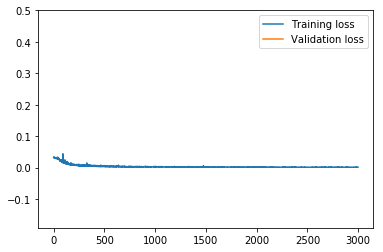

In [425]:
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
plt.ylim(ymax=0.5)

In [426]:
datatest

freq  freqscaled  High Temp (F)  Low Temp (F)  High Dew Point (F)  \
0   -1.396416    0.032546      -0.934410     -0.618759           -1.024026   
1   -1.405981    0.029710      -0.987937     -0.736040           -1.362006   
2   -1.394594    0.033086      -0.773829     -0.736040           -1.193016   
3   -1.380474    0.037272      -1.202046     -1.732925           -1.136686   
4   -1.358156    0.043889      -1.737317     -2.084767           -2.319617   
5   -1.297123    0.061985      -0.720302     -1.322443           -1.981637   
6   -1.263419    0.071978      -0.827356     -1.029241           -1.193016   
7   -1.261597    0.072519      -0.880883     -0.794680           -0.629716   
8   -1.357245    0.044159      -0.934410     -0.325557           -0.404396   
9   -1.451072    0.016340      -0.024449     -0.325557            0.665874   
10  -1.282093    0.066442      -0.399139     -1.087882           -0.348066   
11  -1.283915    0.065901      -1.148518     -1.322443           -0.742376   
12  -1.312154    0.057529      -1.362627     -1.322443           -1.080356   
13  -1.293480    0.063065      -1.523208     -1.322443           -1.643657   
14  -1.269340    0.070223      -0.880883     -1.029241           -0.348066   
15  -1.387762    0.035111      -0.827356     -0.560119           -0.235406   
16  -1.384573    0.036057      -1.094991     -0.853320           -1.024026   
17  -1.414634    0.027144      -1.576735     -1.439724           -1.136686   
18  -1.373187    0.039433      -1.790844     -1.615645           -2.263287   
19  -1.314887    0.056718      -1.362627     -1.439724           -2.037967   
20  -1.319441    0.055368      -1.362627     -1.322443           -2.037967   
21  -1.312609    0.057394      -1.416154     -1.439724           -2.094297   
22  -1.433764    0.021472      -1.416154     -1.381083           -0.967696   
23  -1.418278    0.026063      -1.202046     -1.498364           -1.643657   
24  -1.295301    0.062525      -1.255573     -1.029241           -1.080356   
25  -1.247477    0.076705      -0.399139     -0.911961           -0.573386   
26  -1.223793    0.083727      -0.720302     -0.736040           -0.573386   
27  -1.225159    0.083322      -0.880883     -1.029241           -0.911366   
28  -1.233813    0.080756      -0.934410     -0.618759           -0.686046   
29  -1.307144    0.059014      -0.827356     -0.794680           -1.193016   
30  -1.309876    0.058204      -0.077976     -0.325557           -0.404396   
31  -1.118579    0.114922       0.350241     -0.266917           -0.235406   
32  -1.134521    0.110196      -0.452666     -0.442838           -0.911366   
33  -1.248844    0.076300      -0.077976     -0.501478            0.496884   
34  -1.141353    0.108170      -0.131503     -0.032356            0.496884   
35  -1.445606    0.017961      -0.827356     -1.087882           -0.629716   
36  -1.388673    0.034841      -1.255573     -1.146522           -1.136686   
37  -1.362255    0.042674      -0.773829     -0.853320           -0.855036   
38  -1.452894    0.015800      -1.094991     -1.498364           -0.911366   
39  -1.336294    0.050371      -1.576735     -1.381083           -1.474666   
40  -1.290747    0.063876      -1.202046     -1.381083           -0.855036   
41  -1.271617    0.069548      -1.469681     -1.908846           -1.418336   
42  -1.316709    0.056178      -1.844371     -2.084767           -2.037967   
43  -1.428299    0.023093      -1.844371     -2.788451           -1.981637   
44  -1.462914    0.012829      -2.486696     -3.081653           -3.277227   
45  -1.414634    0.027144      -1.255573     -2.319328           -0.629716   
46  -1.333105    0.051317      -0.238558     -0.736040            0.384224   
47  -1.201930    0.090209      -0.666774     -0.560119           -0.798706   
48  -1.225159    0.083322      -1.255573     -1.146522           -1.249346   
49  -1.230625    0.081702      -1.148518     -1.381083           -0.911366   
50  -1.227437    0.082647      

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


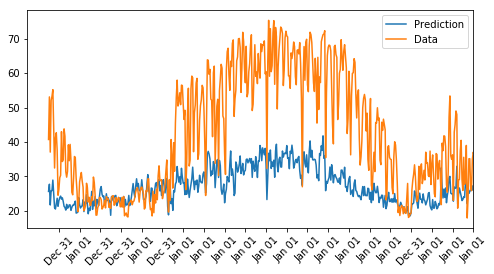

In [438]:
fig, ax = plt.subplots(figsize=(8,4))

mean, std = scaled_features['Low Temp (F)']
predictions = network.run(test_features)*std + mean
ax.plot(predictions[0], label='Prediction')
ax.plot((test_targets['freq']*std + mean).values, label='Data')
ax.set_xlim(right=len(predictions))
ax.legend()

dates = pd.to_datetime(datatest.ix[test_data.index]['freq'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

In [10]:
number_of_test_data = 350
number_of_holdout_data = 150
number_of_training_data = len(data) - number_of_holdout_data - number_of_test_data
print ("total, train, test, holdout:", len(data), number_of_training_data, number_of_test_data, number_of_holdout_data)

total, train, test, holdout: 821 321 350 150


In [11]:
datatrain = data[:number_of_training_data]
datatest = data[-(number_of_test_data+number_of_holdout_data):-number_of_holdout_data]
datahold = data[-number_of_holdout_data:]

In [12]:
in_seq1 = array(datatrain['High Temp (F)'])
in_seq2 = array(datatrain['Low Temp (F)'])
in_seq3 = array(datatrain['High Dew Point (F)'])
in_seq4 = array(datatrain['Low Dew Point (F)'])
in_seq5 = array(datatrain['High Humidity (%)'])
in_seq6 = array(datatrain['Low Humidity (%)'])
in_seq7 = array(datatrain['High Visibility (mi)'])
in_seq8 = array(datatrain['Low Visibility (mi)'])
in_seq9 = array(datatrain['High Wind (mph)'])
in_seq10 = array(datatrain['Avg Wind (mph)'])
in_seq11 = array(datatrain['High Wind Gust (mph)'])
in_seq12 = array(datatrain['Snowfall (in)'])
in_seq13 = array(datatrain['Precip (in)'])
out_seq_train = array(datatrain['freqscaled'])

in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))
in_seq4 = in_seq4.reshape((len(in_seq4), 1))
in_seq5 = in_seq5.reshape((len(in_seq5), 1))
in_seq6 = in_seq6.reshape((len(in_seq6), 1))
in_seq7 = in_seq7.reshape((len(in_seq7), 1))
in_seq8 = in_seq8.reshape((len(in_seq8), 1))
in_seq9 = in_seq9.reshape((len(in_seq9), 1))
in_seq10 = in_seq10.reshape((len(in_seq10), 1))
in_seq11 = in_seq11.reshape((len(in_seq11), 1))
in_seq12 = in_seq12.reshape((len(in_seq12), 1))
in_seq13 = in_seq13.reshape((len(in_seq13), 1))
out_seq_train = out_seq_train.reshape((len(out_seq_train), 1))

In [13]:
datatrain_feed = hstack((in_seq1, in_seq2, in_seq3, in_seq4, in_seq5, in_seq6, in_seq7, in_seq8, in_seq9, in_seq10, in_seq11, in_seq12, in_seq13, out_seq_train))

In [14]:
in_seq1 = array(datatest['High Temp (F)'])
in_seq2 = array(datatest['Low Temp (F)'])
in_seq3 = array(datatest['High Dew Point (F)'])
in_seq4 = array(datatest['Low Dew Point (F)'])
in_seq5 = array(datatest['High Humidity (%)'])
in_seq6 = array(datatest['Low Humidity (%)'])
in_seq7 = array(datatest['High Visibility (mi)'])
in_seq8 = array(datatest['Low Visibility (mi)'])
in_seq9 = array(datatest['High Wind (mph)'])
in_seq10 = array(datatest['Avg Wind (mph)'])
in_seq11 = array(datatest['High Wind Gust (mph)'])
in_seq12 = array(datatest['Snowfall (in)'])
in_seq13 = array(datatest['Precip (in)'])
out_seq_test = array(datatest['freqscaled'])

in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))
in_seq4 = in_seq4.reshape((len(in_seq4), 1))
in_seq5 = in_seq5.reshape((len(in_seq5), 1))
in_seq6 = in_seq6.reshape((len(in_seq6), 1))
in_seq7 = in_seq7.reshape((len(in_seq7), 1))
in_seq8 = in_seq8.reshape((len(in_seq8), 1))
in_seq9 = in_seq9.reshape((len(in_seq9), 1))
in_seq10 = in_seq10.reshape((len(in_seq10), 1))
in_seq11 = in_seq11.reshape((len(in_seq11), 1))
in_seq12 = in_seq12.reshape((len(in_seq12), 1))
in_seq13 = in_seq13.reshape((len(in_seq13), 1))
out_seq_test = out_seq_test.reshape((len(out_seq_test), 1))

In [15]:
datatest_feed = hstack((in_seq1, in_seq2, in_seq3, in_seq4, in_seq5, in_seq6, in_seq7, in_seq8, in_seq9, in_seq10, in_seq11, in_seq12, in_seq13, out_seq_test))

In [16]:
in_seq1 = array(datahold['High Temp (F)'])
in_seq2 = array(datahold['Low Temp (F)'])
in_seq3 = array(datahold['High Dew Point (F)'])
in_seq4 = array(datahold['Low Dew Point (F)'])
in_seq5 = array(datahold['High Humidity (%)'])
in_seq6 = array(datahold['Low Humidity (%)'])
in_seq7 = array(datahold['High Visibility (mi)'])
in_seq8 = array(datahold['Low Visibility (mi)'])
in_seq9 = array(datahold['High Wind (mph)'])
in_seq10 = array(datahold['Avg Wind (mph)'])
in_seq11 = array(datahold['High Wind Gust (mph)'])
in_seq12 = array(datahold['Snowfall (in)'])
in_seq13 = array(datahold['Precip (in)'])
out_seq_hold = array(datahold['freqscaled'])

in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))
in_seq4 = in_seq4.reshape((len(in_seq4), 1))
in_seq5 = in_seq5.reshape((len(in_seq5), 1))
in_seq6 = in_seq6.reshape((len(in_seq6), 1))
in_seq7 = in_seq7.reshape((len(in_seq7), 1))
in_seq8 = in_seq8.reshape((len(in_seq8), 1))
in_seq9 = in_seq9.reshape((len(in_seq9), 1))
in_seq10 = in_seq10.reshape((len(in_seq10), 1))
in_seq11 = in_seq11.reshape((len(in_seq11), 1))
in_seq12 = in_seq12.reshape((len(in_seq12), 1))
in_seq13 = in_seq13.reshape((len(in_seq13), 1))
out_seq_hold = out_seq_hold.reshape((len(out_seq_hold), 1))

In [17]:
datahold_feed = hstack((in_seq1, in_seq2, in_seq3, in_seq4, in_seq5, in_seq6, in_seq7, in_seq8, in_seq9, in_seq10, in_seq11, in_seq12, in_seq13, out_seq_hold))

In [18]:
n_features = datatrain_feed.shape[1]
n_input = 10
generator_train = TimeseriesGenerator(datatrain_feed, out_seq_train, length=n_input, batch_size=len(datatrain_feed))

for i in range(len(generator_train)):
	x, y = generator_train[i]
# 	print('%s => %s' % (x, y))

generator_test = TimeseriesGenerator(datatest_feed, out_seq_test, length=n_input, batch_size=1)

for i in range(len(generator_test)):
	x, y = generator_test[i]
# 	print('%s => %s' % (x, y))

generator_hold = TimeseriesGenerator(datahold_feed, out_seq_hold, length=n_input, batch_size=1)

for i in range(len(generator_hold)):
	x, y = generator_hold[i]
# 	print('%s => %s' % (x, y))

In [19]:
print("timesteps, features:", n_input, n_features)

timesteps, features: 10 14


In [20]:
model = Sequential()

model.add(SimpleRNN(4, activation='relu', input_shape=(n_input, n_features), return_sequences = False))
model.add(Dense(1, activation='tanh'))

adam = Adam(lr=0.01)
model.compile(optimizer=adam, loss='mse')

Instructions for updating:
Colocations handled automatically by placer.


In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 4)                 76        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [22]:
import time

start = time.time()

score = model.fit_generator(generator_train, epochs=200, verbose=2, validation_data=generator_test)


end = time.time()

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
 - 0s - loss: 1.0762 - val_loss: 0.6860
Epoch 2/200
 - 0s - loss: 0.7690 - val_loss: 0.5539
Epoch 3/200
 - 0s - loss: 0.5883 - val_loss: 0.4818
Epoch 4/200
 - 0s - loss: 0.4953 - val_loss: 0.3994
Epoch 5/200
 - 0s - loss: 0.3949 - val_loss: 0.3610
Epoch 6/200
 - 0s - loss: 0.3382 - val_loss: 0.3249
Epoch 7/200
 - 0s - loss: 0.3125 - val_loss: 0.3078
Epoch 8/200
 - 0s - loss: 0.2928 - val_loss: 0.2901
Epoch 9/200
 - 0s - loss: 0.2730 - val_loss: 0.2758
Epoch 10/200
 - 0s - loss: 0.2637 - val_loss: 0.2633
Epoch 11/200
 - 0s - loss: 0.2556 - val_loss: 0.2499
Epoch 12/200
 - 0s - loss: 0.2476 - val_loss: 0.2400
Epoch 13/200
 - 0s - loss: 0.2384 - val_loss: 0.2327
Epoch 14/200
 - 0s - loss: 0.2292 - val_loss: 0.2248
Epoch 15/200
 - 0s - loss: 0.2219 - val_loss: 0.2163
Epoch 16/200
 - 0s - loss: 0.2148 - val_loss: 0.2099
Epoch 17/200
 - 0s - loss: 0.2076 - val_loss: 0.2039
Epoch 18/200
 - 0s - loss: 0.2003 - val_loss: 0.1982
Epoch 1

Epoch 150/200
 - 0s - loss: 0.0845 - val_loss: 0.1016
Epoch 151/200
 - 0s - loss: 0.0845 - val_loss: 0.1016
Epoch 152/200
 - 0s - loss: 0.0845 - val_loss: 0.1016
Epoch 153/200
 - 0s - loss: 0.0845 - val_loss: 0.1016
Epoch 154/200
 - 0s - loss: 0.0845 - val_loss: 0.1016
Epoch 155/200
 - 0s - loss: 0.0845 - val_loss: 0.1016
Epoch 156/200
 - 0s - loss: 0.0845 - val_loss: 0.1016
Epoch 157/200
 - 0s - loss: 0.0845 - val_loss: 0.1016
Epoch 158/200
 - 0s - loss: 0.0845 - val_loss: 0.1016
Epoch 159/200
 - 0s - loss: 0.0845 - val_loss: 0.1016
Epoch 160/200
 - 0s - loss: 0.0845 - val_loss: 0.1016
Epoch 161/200
 - 0s - loss: 0.0845 - val_loss: 0.1016
Epoch 162/200
 - 0s - loss: 0.0845 - val_loss: 0.1016
Epoch 163/200
 - 0s - loss: 0.0845 - val_loss: 0.1016
Epoch 164/200
 - 0s - loss: 0.0845 - val_loss: 0.1016
Epoch 165/200
 - 0s - loss: 0.0845 - val_loss: 0.1016
Epoch 166/200
 - 0s - loss: 0.0845 - val_loss: 0.1016
Epoch 167/200
 - 0s - loss: 0.0845 - val_loss: 0.1016
Epoch 168/200
 - 0s - loss: 

In [23]:
elapsed = end - start
elapsed

62.906534910202026

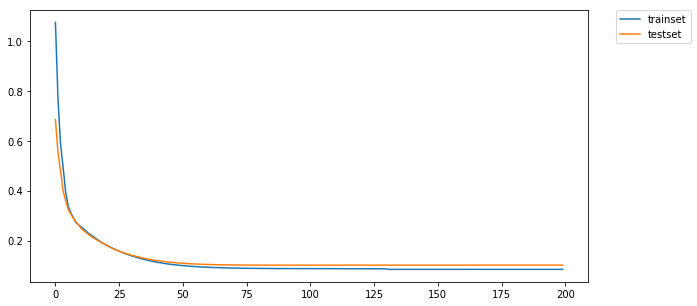

In [24]:
losses = score.history['loss']
val_losses = score.history['val_loss']
plt.figure(figsize=(10,5))
plt.plot(losses, label="trainset")
plt.plot(val_losses, label="testset")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [25]:
df_result = pd.DataFrame({'Actual' : [], 'Prediction' : []})

for i in range(len(generator_test)):
    x, y = generator_test[i]
    x_input = array(x).reshape((1, n_input, n_features))
    yhat = model.predict(x_input, verbose=2)
    df_result = df_result.append({'Actual': scaler.inverse_transform(y)[0][0], 'Prediction': scaler.inverse_transform(yhat)[0][0]}, ignore_index=True)

In [26]:
df_result['Diff'] = 100 * (df_result['Prediction'] - df_result['Actual']) / df_result['Actual']


In [27]:
pd.options.display.max_rows=1000
df_result

Actual   Prediction         Diff
0    1599.0  3701.611572   131.495408
1    3235.0  3701.611572    14.423851
2    2115.0  3701.611572    75.017096
3    2178.0  3701.611572    69.954618
4    3339.0  3701.611572    10.859885
5    3064.0  3701.611572    20.809777
6    1733.0  3701.611572   113.595590
7    1531.0  3701.611572   141.777372
8    1748.0  3701.611572   111.762676
9    2742.0  3701.611572    34.996775
10   2146.0  3701.611572    72.488890
11   2758.0  3701.611572    34.213618
12   2154.0  3701.611572    71.848262
13    966.0  3701.611572   283.189604
14    870.0  3701.611572   325.472595
15   1475.0  3701.611572   150.956717
16   2304.0  3701.611572    60.660224
17   2269.0  3701.611572    63.138456
18   1492.0  3701.611572   148.097290
19    990.0  3701.611572   273.900159
20    238.0  3701.611572  1455.298980
21    573.0  3701.611572   546.005510
22   1352.0  3701.611572   173.787838
23   1545.0  3701.611572   139.586510
24   1705.0  3701.611572   117.103318
25   1385.0  3701.611572   167.264373
26   1161.0  3701.611572   218.829593
27    274.0  3701.611572  1250.953129
28    357.0  3701.611572   936.865987
29    486.0  3701.611572   661.648472
30   1301.0  3701.611572   184.520490
31   1144.0  3701.611572   223.567445
32    601.0  3701.611572   515.908747
33    775.0  3701.611572   377.627300
34    473.0  3701.611572   682.581728
35    481.0  3701.611572   669.565815
36    801.0  3701.611572   362.123792
37    651.0  3701.611572   468.603928
38   1534.0  3701.611572   141.304535
39   1330.0  3701.611572   178.316660
40    835.0  3701.611572   343.306775
41    106.0  3701.611572  3392.086389
42    111.0  3701.611572  3234.785200
43    392.0  3701.611572   844.288666
44    469.0  3701.611572   689.256199
45    773.0  3701.611572   378.863075
46    763.0  3701.611572   385.139131
47    686.0  3701.611572   439.593524
48    336.0  3701.611572  1001.670111
49    395.0  3701.611572   837.116854
50    485.0  3701.611572   663.218881
51    665.0  3701.611572   456.633319
52    379.0  3701.611572   876.678515
53    798.0  3701.611572   363.861099
54    717.0  3701.611572   416.263818
55    725.0  3701.611572   410.567113
56    400.0  3701.611572   825.402893
57    531.0  3701.611572   597.101991
58    363.0  3701.611572   919.727706
59    773.0  3701.611572   378.863075
60    820.0  3701.611572   351.416045
61    837.0  3701.611572   342.247500
62    478.0  3701.611572   674.395726
63    518.0  3701.611572   614.596829
64    763.0  3701.611572   385.139131
65    597.0  3701.611572   520.035439
66    690.0  3701.611572   436.465445
67    775.0  3701.611572   377.627300
68    723.0  3701.611572   411.979471
69    427.0  3701.611572   766.887956
70    416.0  3701.611572   789.810474
71    771.0  3701.611572   380.105262
72    409.0  3701.611572   805.039504
73    806.0  3701.611572   359.257019
74     84.0  3701.611572  4306.680443
75    143.0  3701.611572  2488.539561
76    188.0  3701.611572  1868.942326
77     63.0  3701.611572  5775.573924
78     38.0  3701.611572  9641.083085
79    530.0  3701.611572   598.417278
80    591.0  3701.611572   526.330215
81    607.0  3701.611572   509.820687
82    673.0  3701.611572   450.016578
83    496.0  3701.611572   646.292656
84    613.0  3701.611572   503.851806
85    635.0  3701.611572   482.930956
86    784.0  3701.611572   372.144333
87    983.0  3701.611572   276.562724
88   1094.0  3701.611572   238.355720
89   1142.0  3701.611572   224.134113
90    908.0  3701.611572   307.666473
91    596.0  3701.611572   521.075767
92    957.0  3701.611572   286.793268
93   1126.0  3701.611572   228.739926
94   1163.0  3701.611572   218.281305
95   1043.0  3701.611572   254.900438
96    894.0  3701.611572   314.050511
97    336.0  3701.611572  1001.670111
98    389.0  3701.611572   851.571098
99   1029.0  3701.611572   259.729016
100   991.0  3701.611572   273.522863
101  1465.0  3701.611572   152.669732
102  1469.0  3701.611572   151.981727
103   636.0  3701.611572   482.014398
104   316.0  37

In [28]:
mean = df_result['Actual'].mean()
mae = (df_result['Actual'] - df_result['Prediction']).abs().mean()

print("mean: ", mean)
print("mae:", mae)
print("mae/mean ratio: ", 100*mae/mean,"%")
print("correctness: ", 100 - 100*mae/mean,"%")

mean:  3565.25
mae: 2157.723504997702
mae/mean ratio:  60.520959399697134 %
correctness:  39.479040600302866 %


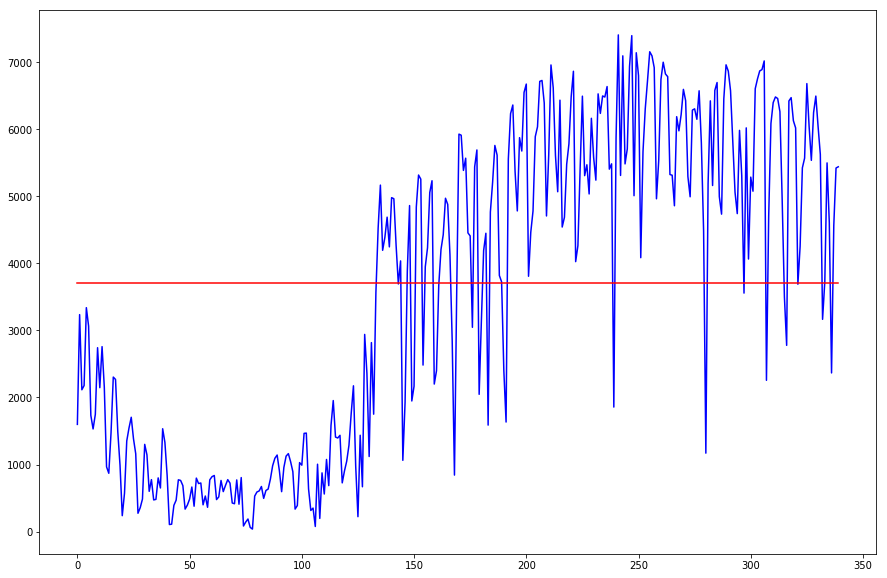

In [29]:
plt.figure(figsize=(15,10))
plt.plot(df_result['Actual'], color='blue')
plt.plot(df_result['Prediction'], color='red')
plt.show()

In [30]:
df_result = pd.DataFrame({'Actual' : [], 'Prediction' : []})

for i in range(len(generator_hold)):
    x, y = generator_hold[i]
    x_input = array(x).reshape((1, n_input, n_features))
    yhat = model.predict(x_input, verbose=2)
    df_result = df_result.append({'Actual': scaler.inverse_transform(y)[0][0], 'Prediction': scaler.inverse_transform(yhat)[0][0]}, ignore_index=True)

In [31]:
df_result['Diff'] = 100 * (df_result['Prediction'] - df_result['Actual']) / df_result['Actual']
df_result

Actual   Prediction          Diff
0    4138.0  3701.611572 -1.054588e+01
1    4482.0  3701.611572 -1.741161e+01
2    4629.0  3701.611572 -2.003431e+01
3    4432.0  3701.611572 -1.647988e+01
4    3259.0  3701.611572  1.358121e+01
5    3928.0  3701.611572 -5.763453e+00
6    2199.0  3701.611572  6.833159e+01
7    1786.0  3701.611572  1.072571e+02
8    3662.0  3701.611572  1.081692e+00
9    4477.0  3701.611572 -1.731938e+01
10   1231.0  3701.611572  2.006996e+02
11   1054.0  3701.611572  2.511965e+02
12   1818.0  3701.611572  1.036090e+02
13   2463.0  3701.611572  5.028874e+01
14   1738.0  3701.611572  1.129811e+02
15   3577.0  3701.611572  3.483689e+00
16   3553.0  3701.611572  4.182707e+00
17   4130.0  3701.611572 -1.037260e+01
18   3665.0  3701.611572  9.989515e-01
19   3748.0  3701.611572 -1.237685e+00
20   2172.0  3701.611572  7.042411e+01
21   1998.0  3701.611572  8.526584e+01
22   3589.0  3701.611572  3.137687e+00
23   3281.0  3701.611572  1.281962e+01
24   3703.0  3701.611572 -3.749467e-02
25   3506.0  3701.611572  5.579337e+00
26   3303.0  3701.611572  1.206817e+01
27    676.0  3701.611572  4.475757e+02
28    841.0  3701.611572  3.401441e+02
29   2661.0  3701.611572  3.910603e+01
30   2708.0  3701.611572  3.669171e+01
31   2274.0  3701.611572  6.277975e+01
32   2204.0  3701.611572  6.794971e+01
33   2191.0  3701.611572  6.894622e+01
34   1143.0  3701.611572  2.238505e+02
35    906.0  3701.611572  3.085664e+02
36   2282.0  3701.611572  6.220910e+01
37   2856.0  3701.611572  2.960825e+01
38   2738.0  3701.611572  3.519399e+01
39   2175.0  3701.611572  7.018904e+01
40   1318.0  3701.611572  1.808507e+02
41    205.0  3701.611572  1.705664e+03
42    420.0  3701.611572  7.813361e+02
43     93.0  3701.611572  3.880227e+03
44    362.0  3701.611572  9.225446e+02
45    474.0  3701.611572  6.809307e+02
46    418.0  3701.611572  7.855530e+02
47    159.0  3701.611572  2.228058e+03
48    406.0  3701.611572  8.117270e+02
49    244.0  3701.611572  1.417054e+03
50    173.0  3701.611572  2.039660e+03
51    753.0  3701.611572  3.915819e+02
52   1295.0  3701.611572  1.858387e+02
53     21.0  3701.611572  1.752672e+04
54     64.0  3701.611572  5.683768e+03
55    148.0  3701.611572  2.401089e+03
56    183.0  3701.611572  1.922739e+03
57   1063.0  3701.611572  2.482231e+02
58   1415.0  3701.611572  1.615980e+02
59   1644.0  3701.611572  1.251589e+02
60   1993.0  3701.611572  8.573064e+01
61   1551.0  3701.611572  1.386597e+02
62    885.0  3701.611572  3.182612e+02
63    618.0  3701.611572  4.989663e+02
64    715.0  3701.611572  4.177079e+02
65   1936.0  3701.611572  9.119894e+01
66   1072.0  3701.611572  2.452996e+02
67   1876.0  3701.611572  9.731405e+01
68   2028.0  3701.611572  8.252523e+01
69   1289.0  3701.611572  1.871692e+02
70   1477.0  3701.611572  1.506169e+02
71   1787.0  3701.611572  1.071411e+02
72   1423.0  3701.611572  1.601273e+02
73   2466.0  3701.611572  5.010590e+01
74   2052.0  3701.611572  8.039043e+01
75   2073.0  3701.611572  7.856303e+01
76   1589.0  3701.611572  1.329523e+02
77   1551.0  3701.611572  1.386597e+02
78   2507.0  3701.611572  4.765104e+01
79   1254.0  3701.611572  1.951843e+02
80   2016.0  3701.611572  8.361169e+01
81   2363.0  3701.611572  5.664882e+01
82   1629.0  3701.611572  1.272321e+02
83    908.0  3701.611572  3.076665e+02
84    793.0  3701.611572  3.667858e+02
85   2414.0  3701.611572  5.333934e+01
86   2378.0  3701.611572  5.566071e+01
87   1457.0  3701.611572  1.540571e+02
88   2004.0  3701.611572  8.471116e+01
89   2156.0  3701.611572  7.168885e+01
90   1476.0  3701.611572  1.507867e+02
91    500.0  3701.611572  6.403223e+02
92   2804.0  3701.611572  3.201182e+01
93   2523.0  3701.611572  4.671469e+01
94   3080.0  3701.611572  2.018219e+01
95   3063.0  3701.611572  2.084922e+01
96   2679.0  3701.611572  3.817139e+01
97   1252.0  3701.611572  1.956559e+02
98    967.0  3701.611572  2.827933e+02
99   1715.0  3701.611572  1.158374e+02
100  3775.0  3701.611572 -1.944064e+00
101  4573.0  3701.611572 -1

In [32]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_result)

     Actual   Prediction          Diff
0    4138.0  3701.611572 -1.054588e+01
1    4482.0  3701.611572 -1.741161e+01
2    4629.0  3701.611572 -2.003431e+01
3    4432.0  3701.611572 -1.647988e+01
4    3259.0  3701.611572  1.358121e+01
5    3928.0  3701.611572 -5.763453e+00
6    2199.0  3701.611572  6.833159e+01
7    1786.0  3701.611572  1.072571e+02
8    3662.0  3701.611572  1.081692e+00
9    4477.0  3701.611572 -1.731938e+01
10   1231.0  3701.611572  2.006996e+02
11   1054.0  3701.611572  2.511965e+02
12   1818.0  3701.611572  1.036090e+02
13   2463.0  3701.611572  5.028874e+01
14   1738.0  3701.611572  1.129811e+02
15   3577.0  3701.611572  3.483689e+00
16   3553.0  3701.611572  4.182707e+00
17   4130.0  3701.611572 -1.037260e+01
18   3665.0  3701.611572  9.989515e-01
19   3748.0  3701.611572 -1.237685e+00
20   2172.0  3701.611572  7.042411e+01
21   1998.0  3701.611572  8.526584e+01
22   3589.0  3701.611572  3.137687e+00
23   3281.0  3701.611572  1.281962e+01
24   3703.0  3701.611572 

In [33]:
mean = df_result['Actual'].mean()
mae = (df_result['Actual'] - df_result['Prediction']).abs().mean()

print("mean: ", mean)
print("mae:", mae)
print("mae/mean ratio: ", 100*mae/mean,"%")
print("correctness: ", 100 - 100*mae/mean,"%")

mean:  2013.892857142857
mae: 1770.2765659877232
mae/mean ratio:  87.90321489591277 %
correctness:  12.096785104087232 %


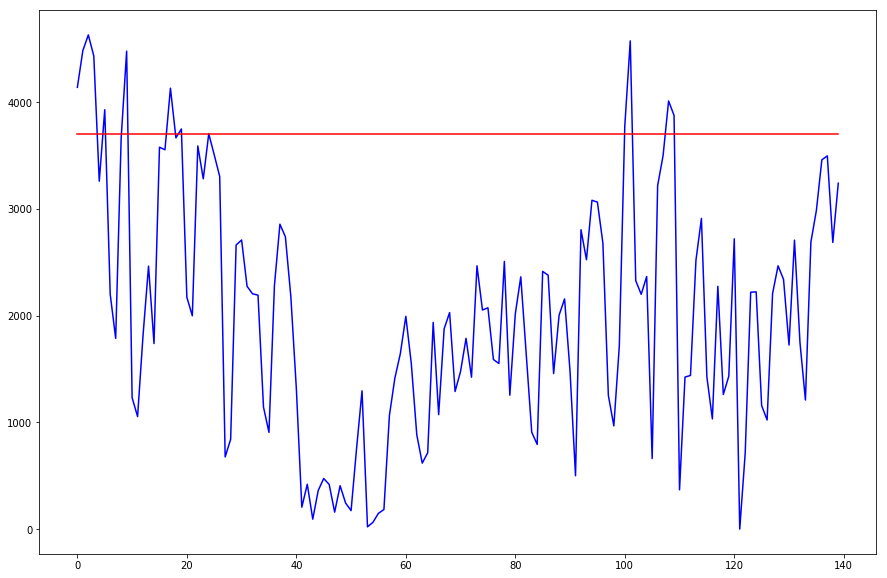

In [34]:
plt.figure(figsize=(15,10))
plt.plot(df_result['Actual'], color='blue')
plt.plot(df_result['Prediction'], color='red')
plt.show()

# RNN LSTM

In [35]:
data = data['freqscaled']
data

0      0.032546
1      0.029710
2      0.033086
3      0.037272
4      0.043889
5      0.061985
6      0.071978
7      0.072519
8      0.044159
9      0.016340
10     0.066442
11     0.065901
12     0.057529
13     0.063065
14     0.070223
15     0.035111
16     0.036057
17     0.027144
18     0.039433
19     0.056718
20     0.055368
21     0.057394
22     0.021472
23     0.026063
24     0.062525
25     0.076705
26     0.083727
27     0.083322
28     0.080756
29     0.059014
30     0.058204
31     0.114922
32     0.110196
33     0.076300
34     0.108170
35     0.017961
36     0.034841
37     0.042674
38     0.015800
39     0.050371
40     0.063876
41     0.069548
42     0.056178
43     0.023093
44     0.012829
45     0.027144
46     0.051317
47     0.090209
48     0.083322
49     0.081702
50     0.082647
51     0.072924
52     0.100608
53     0.094531
54     0.050777
55     0.097772
56     0.086563
57     0.062120
58     0.084943
59     0.111411
60     0.111816
61     0.078055
62     0

In [36]:
data.to_csv('C:/Users/Davor/Desktop/Notebooks/freqscaled.csv')

In [37]:
data.values.astype("float32")

array([0.03254558, 0.02970966, 0.03308575, 0.03727211, 0.04388927,
       0.06198515, 0.07197839, 0.07251857, 0.04415935, 0.01634031,
       0.0664416 , 0.06590142, 0.0575287 , 0.0630655 , 0.07022282,
       0.03511141, 0.03605672, 0.02714382, 0.03943282, 0.05671844,
       0.055368  , 0.05739365, 0.02147198, 0.02606347, 0.06252532,
       0.07670493, 0.08372721, 0.08332208, 0.08075625, 0.05901418,
       0.05820392, 0.11492235, 0.11019582, 0.07629979, 0.10817015,
       0.01796084, 0.03484133, 0.04267387, 0.01580014, 0.05037137,
       0.06387576, 0.0695476 , 0.05617826, 0.0230925 , 0.01282917,
       0.02714382, 0.05131668, 0.09020932, 0.08332208, 0.08170155,
       0.08264686, 0.0729237 , 0.1006077 , 0.09453072, 0.0507765 ,
       0.09777178, 0.08656313, 0.06212019, 0.08494261, 0.11141121,
       0.11181634, 0.07805537, 0.10155301, 0.08858879, 0.08764348,
       0.08885888, 0.14071573, 0.18014854, 0.25253206, 0.13328832,
       0.20189062, 0.21836597, 0.21728562, 0.1513842 , 0.06914

In [38]:
data = data.values.reshape(-1,1)     #THIS IS TO BE USED TO GET CORRECT RESHAPE

In [39]:
data[0:5]

array([[0.03254558],
       [0.02970966],
       [0.03308575],
       [0.03727211],
       [0.04388926]])

In [40]:
# Using 60% of data for training, 40% for validation.
TRAIN_SIZE = 0.6

train_size = int(len(data) * TRAIN_SIZE)
test_size = len(data) - train_size
train, test = data[0:train_size, :], data[train_size:len(data), :]
print("Number of entries (training set, test set): " + str((len(train), len(test))))

Number of entries (training set, test set): (492, 329)


In [41]:
dataset = data

# FIXME: This helper function should be rewritten using numpy's shift function. See below.
def create_dataset(dataset, window_size = 1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + window_size, 0])
    return(np.array(data_X), np.array(data_Y))

In [42]:
# Create test and training sets for one-step-ahead regression.
window_size = 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape:")
print(train_X.shape)

# Reshape the input data into appropriate form for Keras.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New training data shape:")
print(train_X.shape)

Original training data shape:
(490, 1)
New training data shape:
(490, 1, 1)


In [43]:
#train_X.shape

In [44]:
#train_Y.shape

In [45]:
#train_X7 = train_X.reshape((-1, 1))
#train_X7.shape

In [46]:
#train_Y2 = train_Y.reshape((-1, 1))
#train_Y2.shape

In [47]:
K.clear_session()  #DOES NOT WORK WITHOUT THIS


#height = 28
#width = 28
#channels = 1
#n_inputs = height * width

#conv1_fmaps = 32
#conv1_ksize = 3
#conv1_stride = 1
#conv1_pad = "SAME"

#conv2_fmaps = 64
#conv2_ksize = 3
#conv2_stride = 2
#conv2_pad = "SAME"

#pool3_fmaps = conv2_fmaps

#n_fc1 = 64
#n_outputs = 10


#with tf.name_scope("inputs"):
   # X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
    #X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])
   # Y = tf.placeholder(tf.int32, shape=[None], name="Y")

#conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         #strides=conv1_stride, padding=conv1_pad,
                         #activation=tf.nn.relu, name="conv1")
#conv2 = tf.layers.conv2d(conv1, filters=conv2_fmaps, kernel_size=conv2_ksize,
                         #strides=conv2_stride, padding=conv2_pad,
                         #activation=tf.nn.relu, name="conv2")

#with tf.name_scope("pool3"):
    #pool3 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    #pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps * 7 * 7])

#with tf.name_scope("fc1"):
    #fc1 = tf.layers.dense(pool3_flat, n_fc1, activation=tf.nn.relu, name="fc1")
    


#with tf.name_scope("output"):
    #logits = tf.layers.dense(fc1, n_outputs, name="output")
   # Y_proba = tf.nn.softmax(logits, name="Y_proba")

#with tf.name_scope("eval"):
    #correct = tf.nn.in_top_k(logits, Y, 1)
    #accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

#with tf.name_scope("init_and_save"):
    #init = tf.global_variables_initializer()
    #saver = tf.train.Saver()

def fit_model(train_X, train_Y, window_size = 1):       
    model = Sequential()
    
    model.add(LSTM(4, 
                   input_shape = (1, window_size)))
    model.add(Dense(1))
    model.compile(loss = "mean_squared_error", 
                  optimizer = "adam")
    model.fit(train_X, 
              train_Y, 
              epochs = 100, 
              batch_size = 1, 
              verbose = 2)
    #acc_batch = accuracy.eval(feed_dict={X: train_X, Y: train_Y})
    #print(acc_batch)
    
    #sess = tf.InteractiveSession()
    #with sess.as_default():
        #print("accurracy:")
        #feed_dict={X: train_X, Y: train_Y}
        #ev = feed_dict.eval()
        #print(ev)
        
    #with tf.Session() as sess:
       # init.run()
       # for epoch in range(n_epochs):
            #for X_batch, y_batch in shuffle_batch(test_X, test_Y, batch_size):
                #sess.run(training_op, feed_dict={X: test_X, Y: test_Y})
            #acc_batch = accuracy.eval(feed_dict={X: test_X, Y: test_Y})
       # print(epoch, "Last batch accuracy:", acc_batch)
    
    
    
    test_acc = []

    #with tf.Session as sess:
    #with self.session_scope() as session:
       # with sess.as_default():

    # Restore    
                #for X_t, Y_t in get_batches(test_X, test_Y, batch_size):
                    #feed = {inputs_: X_t,
                    #labels_: Y_t,
                    #keep_prob_: 1}
        
                #batch_acc = sess.run(accuracy, feed_dict=feed)
                #test_acc.append(batch_acc)
                #print("Test accuracy: {:.6f}".format(np.mean(test_acc)))
    
    
    
    
    

    
    return(model)
# Fit the first model.

model1 = fit_model(train_X, train_Y, window_size)



K.clear_session() # OR THIS

Epoch 1/100
 - 1s - loss: 0.0679
Epoch 2/100
 - 1s - loss: 0.0264
Epoch 3/100
 - 1s - loss: 0.0182
Epoch 4/100
 - 1s - loss: 0.0163
Epoch 5/100
 - 1s - loss: 0.0159
Epoch 6/100
 - 1s - loss: 0.0162
Epoch 7/100
 - 1s - loss: 0.0161
Epoch 8/100
 - 1s - loss: 0.0161
Epoch 9/100
 - 0s - loss: 0.0161
Epoch 10/100
 - 1s - loss: 0.0160
Epoch 11/100
 - 0s - loss: 0.0160
Epoch 12/100
 - 0s - loss: 0.0161
Epoch 13/100
 - 0s - loss: 0.0161
Epoch 14/100
 - 1s - loss: 0.0160
Epoch 15/100
 - 1s - loss: 0.0159
Epoch 16/100
 - 1s - loss: 0.0159
Epoch 17/100
 - 1s - loss: 0.0159
Epoch 18/100
 - 1s - loss: 0.0159
Epoch 19/100
 - 1s - loss: 0.0161
Epoch 20/100
 - 1s - loss: 0.0158
Epoch 21/100
 - 1s - loss: 0.0158
Epoch 22/100
 - 1s - loss: 0.0156
Epoch 23/100
 - 1s - loss: 0.0158
Epoch 24/100
 - 1s - loss: 0.0158
Epoch 25/100
 - 1s - loss: 0.0158
Epoch 26/100
 - 1s - loss: 0.0157
Epoch 27/100
 - 1s - loss: 0.0158
Epoch 28/100
 - 1s - loss: 0.0157
Epoch 29/100
 - 0s - loss: 0.0158
Epoch 30/100
 - 1s - lo

In [48]:
#train_X7.shape

In [49]:
train_X.shape

(490, 1, 1)

In [50]:
train_Y.shape

(490,)

In [51]:
#train_Y2.shape

In [52]:
#train_X7.ndim

In [53]:
train_X.ndim

3

In [54]:
train_Y.ndim

1

In [55]:
#train_Y2.ndim

In [56]:
test_X.shape

(327, 1, 1)

In [57]:
#test_X7 = test_X.reshape((-1, 1))
#test_X7.shape

In [58]:
test_Y.shape

(327,)

In [59]:
#test_Y2 = test_Y.reshape((-1, 1))
#test_Y2.shape

In [60]:
train_X = train_X.reshape((-1, 1))
test_X = test_X.reshape((-1, 1))


# Scoring and correctness - RMSE, mean?

In [61]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score



#train_X.shape
#train_Y.shape


In [62]:


def predict_and_score(model, X, Y):
    # Make predictions on the original scale of the data.
    pred = scaler.inverse_transform(X)
    #pred = scaler.inverse_transform(model.predict(X))
    # Prepare Y data to also be on the original scale for interpretability.
    orig_data = scaler.inverse_transform([Y])
    # Calculate RMSE.
    
    
    
    #print("\tTest fscore:\t{:.4f} ".format(metrics.f1_score(orig_data, pred, average='weighted')))
    
    score = math.sqrt(mean_squared_error(orig_data[0], pred[:, 0]))
    return(score, pred)

rmse_train, train_predict = predict_and_score(model1, train_X, train_Y)
rmse_test, test_predict = predict_and_score(model1, test_X, test_Y)

#test = model1.score(test_X, test_Y)

#print("\tTest fscore:\t{:.4f} ".format(f1_score(test_Y, test_X, average='weighted')))

#rfr.score(test_X,test_Y)

#print(accuracy_score(test_Y, test_X, normalize=True, sample_weight=None))

#confusion_matrix(test_Y, test_X)

#clf = svm.SVC(gamma=0.001, C=100.)

#clf.fit(train_X, train_Y)
#clf.score(train_X, train_Y)



print("Training data score: %.2f RMSE" % rmse_train)
print("Test data score: %.2f RMSE" % rmse_test)
#print(test)

Training data score: 956.52 RMSE
Test data score: 1226.23 RMSE


In [63]:
a = scaler.inverse_transform([train_Y]) #this is original data 
b = train_predict #this is predicted data
b = b.T #TRANSPOSE
c = a-b
cabs = np.absolute(c)

bm = b.mean()


am = a.mean()

correct = 1 - (np.absolute(am-bm) / am)
correct


0.9986236482384947

In [64]:
#mean2 = a.mean()
#mae2 = np.absolute(c).mean()

#print("mean: ", mean2)
#print("mae:", mae2)
#print("mae/mean ratio: ", 100*mae2/mean2,"%")
#print("correctness: ", 100 - 100*mae2/mean2,"%")

In [65]:
print("Correctness is:")
print(rmse_train / rmse_test)

Correctness is:
0.7800472246750146


In [66]:
#from sklearn.metrics import accuracy_score


#acc_test = np.mean([
        #accuracy_score(feed_dict={test_X, test_Y})
        #for test_X in model1 ])

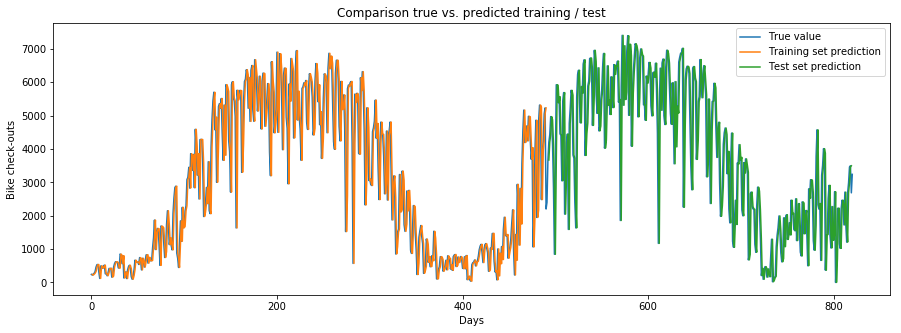

In [67]:
# Start with training predictions.
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[window_size:len(train_predict) + window_size, :] = train_predict

# Add test predictions.
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (window_size * 2) + 1:len(dataset) - 1, :] = test_predict

# Create the plot.
plt.figure(figsize = (15, 5))
plt.plot(scaler.inverse_transform(dataset), label = "True value")    #or just use "bikes['freq']"
plt.plot(train_predict_plot, label = "Training set prediction")
plt.plot(test_predict_plot, label = "Test set prediction")
plt.xlabel("Days")
plt.ylabel("Bike check-outs")
plt.title("Comparison true vs. predicted training / test")
plt.legend()
plt.show()

# HAR CNN + LSTM training

In [69]:
import pandas as pd 
import numpy as np
import os

def read_data(data_path, split = "train"):
	""" Read data """

	# Fixed params
	n_class = 6
	n_steps = 128

	# Paths
	path_ = os.path.join(data_path, split)
	path_signals = os.path.join(path_, "Inertial_Signals")

	# Read labels and one-hot encode
	label_path = os.path.join(path_, "y_" + split + ".txt")
	labels = pd.read_csv(label_path, header = None)

	# Read time-series data
	channel_files = os.listdir(path_signals)
	channel_files.sort()
	n_channels = len(channel_files)
	posix = len(split) + 5

	# Initiate array
	list_of_channels = []
	X = np.zeros((len(labels), n_steps, n_channels))
	i_ch = 0
	for fil_ch in channel_files:
		channel_name = fil_ch[:-posix]
		dat_ = pd.read_csv(os.path.join(path_signals,fil_ch), delim_whitespace = True, header = None)
		X[:,:,i_ch] = dat_.as_matrix()

		# Record names
		list_of_channels.append(channel_name)

		# iterate
		i_ch += 1

	# Return 
	return X, labels[0].values, list_of_channels

def standardize(train, test):
	""" Standardize data """

	# Standardize train and test
	X_train = (train - np.mean(train, axis=0)[None,:,:]) / np.std(train, axis=0)[None,:,:]
	X_test = (test - np.mean(test, axis=0)[None,:,:]) / np.std(test, axis=0)[None,:,:]

	return X_train, X_test

def one_hot(labels, n_class = 6):
	""" One-hot encoding """
	expansion = np.eye(n_class)
	y = expansion[:, labels-1].T
	assert y.shape[1] == n_class, "Wrong number of labels!"

	return y

def get_batches(X, y, batch_size = 100):
	""" Return a generator for batches """
	n_batches = len(X) // batch_size
	X, y = X[:n_batches*batch_size], y[:n_batches*batch_size]

	# Loop over batches and yield
	for b in range(0, len(X), batch_size):
		yield X[b:b+batch_size], y[b:b+batch_size]

In [90]:
X_train, labels_train, list_ch_train = read_data(data_path="./data/", split="train") # train
X_test, labels_test, list_ch_test = read_data(data_path="./data/", split="test") # test

assert list_ch_train == list_ch_test, "Mistmatch in channels!"


FileNotFoundError: File b'C:/Users/Davor/Desktop/Notebooks/data.csv\\train\\y_train.txt' does not exist

In [102]:
# Standardize
train_X, test_X = standardize(train_X, test_X )

IndexError: too many indices for array

# Start from here

In [76]:
lstm_size = 27         # 3 times the amount of channels
lstm_layers = 2        # Number of layers
batch_size = 600       # Batch size
seq_len = 128          # Number of steps
learning_rate = 0.0001  # Learning rate (default is 0.001)
epochs = 1000

# Fixed
n_classes = 6
n_channels = 9

In [77]:
graph = tf.Graph()

# Construct placeholders
with graph.as_default():
    inputs_ = tf.placeholder(tf.float32, [None, seq_len, n_channels], name = 'inputs')
    labels_ = tf.placeholder(tf.float32, [None, n_classes], name = 'labels')
    keep_prob_ = tf.placeholder(tf.float32, name = 'keep')
    learning_rate_ = tf.placeholder(tf.float32, name = 'learning_rate')

In [78]:
# Convolutional layers
with graph.as_default():
    # (batch, 128, 9) --> (batch, 128, 18)
    conv1 = tf.layers.conv1d(inputs=inputs_, filters=18, kernel_size=2, strides=1, 
                             padding='same', activation = tf.nn.relu)
    n_ch = n_channels *2

Instructions for updating:
Use keras.layers.conv1d instead.


In [79]:
with graph.as_default():
    # Construct the LSTM inputs and LSTM cells
    lstm_in = tf.transpose(conv1, [1,0,2]) # reshape into (seq_len, batch, channels)
    lstm_in = tf.reshape(lstm_in, [-1, n_ch]) # Now (seq_len*N, n_channels)
    
    # To cells
    lstm_in = tf.layers.dense(lstm_in, lstm_size, activation=None) # or tf.nn.relu, tf.nn.sigmoid, tf.nn.tanh?
    
    # Open up the tensor into a list of seq_len pieces
    lstm_in = tf.split(lstm_in, seq_len, 0)
    
    # Add LSTM layers
    lstm = tf.contrib.rnn.BasicLSTMCell(lstm_size)
    drop = tf.contrib.rnn.DropoutWrapper(lstm, output_keep_prob=keep_prob_)
    cell = tf.contrib.rnn.MultiRNNCell([drop] * lstm_layers)
    initial_state = cell.zero_state(batch_size, tf.float32)

Instructions for updating:
Use keras.layers.dense instead.

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.


In [80]:
with graph.as_default():
    outputs, final_state = tf.contrib.rnn.static_rnn(cell, lstm_in, dtype=tf.float32,
                                                     initial_state = initial_state)
    
    # We only need the last output tensor to pass into a classifier
    logits = tf.layers.dense(outputs[-1], n_classes, name='logits')
    
    # Cost function and optimizer
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels_))
    #optimizer = tf.train.AdamOptimizer(learning_rate_).minimize(cost) # No grad clipping
    
    # Grad clipping
    train_op = tf.train.AdamOptimizer(learning_rate_)

    gradients = train_op.compute_gradients(cost)
    capped_gradients = [(tf.clip_by_value(grad, -1., 1.), var) for grad, var in gradients]
    optimizer = train_op.apply_gradients(capped_gradients)
    
    # Accuracy
    correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(labels_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [122]:
validation_acc = []
validation_loss = []

train_acc = []
train_loss = []

with graph.as_default():
    saver = tf.train.Saver()

with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    iteration = 1
    
    for e in range(epochs):
        # Initialize 
        state = sess.run(initial_state)
        
        # Loop over batches
        #for X,Y in get_batches(train_X, train_Y, batch_size):
            
            # Feed dictionary
        feed = {inputs_ : train_X, labels_ : train_Y, keep_prob_ : 0.5, 
                    initial_state : state, learning_rate_ : learning_rate}
            
        loss, _ , state, acc = sess.run([cost, optimizer, final_state, accuracy],feed_dict = feed)
        train_acc.append(acc)
        train_loss.append(loss)
            
            # Print at each 5 iters
        if (iteration % 5 == 0):
                print("Epoch: {}/{}".format(e, epochs),
                      "Iteration: {:d}".format(iteration),
                      "Train loss: {:6f}".format(loss),
                      "Train acc: {:.6f}".format(acc))
            
            # Compute validation loss at every 25 iterations
        if (iteration%25 == 0):
                
                # Initiate for validation set
            val_state = sess.run(cell.zero_state(batch_size, tf.float32))
                
            val_acc_ = []
            val_loss_ = []
            for x_v, y_v in get_batches(X_vld, Y_vld, batch_size):
                    # Feed
                feed = {inputs_ : x_v, labels_ : y_v, keep_prob_ : 1.0, initial_state : val_state}
                    
                    # Loss
                loss_v, state_v, acc_v = sess.run([cost, final_state, accuracy], feed_dict = feed)
                    
                val_acc_.append(acc_v)
                val_loss_.append(loss_v)
                
                # Print info
            print("Epoch: {}/{}".format(e, epochs),
                      "Iteration: {:d}".format(iteration),
                      "Validation loss: {:6f}".format(np.mean(val_loss_)),
                      "Validation acc: {:.6f}".format(np.mean(val_acc_)))
                
                # Store
            validation_acc.append(np.mean(val_acc_))
            validation_loss.append(np.mean(val_loss_))
            
            # Iterate 
        iteration += 1
            
    saver.save(sess,"checkpoints-crnn/har.ckpt")


ValueError: Cannot feed value of shape (490, 1) for Tensor 'inputs:0', which has shape '(?, 128, 9)'

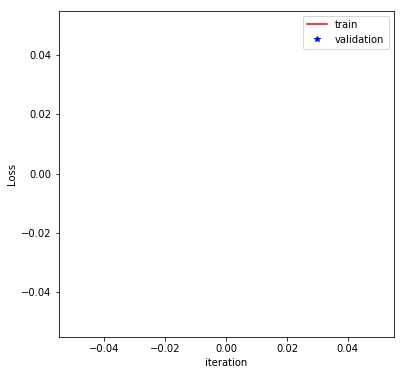

In [123]:
# Plot training and test loss
t = np.arange(iteration-1)

plt.figure(figsize = (6,6))
plt.plot(t, np.array(train_loss), 'r-', t[t % 25 == 0], np.array(validation_loss), 'b*')
plt.xlabel("iteration")
plt.ylabel("Loss")
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

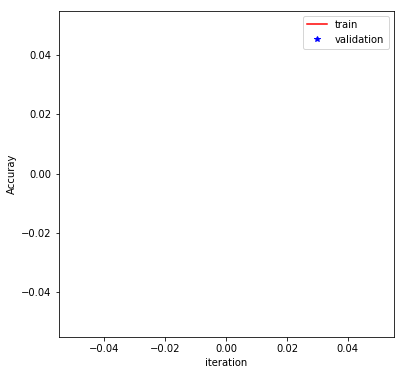

In [124]:
# Plot Accuracies
plt.figure(figsize = (6,6))

plt.plot(t, np.array(train_acc), 'r-', t[t % 25 == 0], validation_acc, 'b*')
plt.xlabel("iteration")
plt.ylabel("Accuray")
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [125]:
test_acc = []

with tf.Session(graph=graph) as sess:
    # Restore
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints-crnn'))
    
    for x_t, y_t in get_batches(test_X, test_Y, batch_size):
        feed = {inputs_: x_t,
                labels_: y_t,
                keep_prob_: 1}
        
        batch_acc = sess.run(accuracy, feed_dict=feed)
        test_acc.append(batch_acc)
    print("Test accuracy: {:.6f}".format(np.mean(test_acc)))

INFO:tensorflow:Restoring parameters from checkpoints-crnn\har.ckpt
Test accuracy: nan


C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


# ARIMA test - BENCHMARK!

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics import tsaplots
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 6 
%matplotlib inline

In [117]:

# fix random seed for reproducibility
np.random.seed(10)
#see current working directory
cwd = os.getcwd()
#change it to the current path
os.chdir("C:/Users/Davor/")
# load the dataset
path = './Desktop/Notebooks/data.csv'
def getTansformedData(path):
    frame = pd.read_csv(path,engine='python',skiprows=0)
    return frame

In [118]:
data=getTansformedData(path)  
def num_missing(x):
    return sum(x.isnull())
data.apply(num_missing, axis=0)

Unnamed: 0              0
starttime               0
freq                    0
freqscaled              0
Year                    0
Month                   0
Day                     0
High Temp (F)           0
Low Temp (F)            0
High Dew Point (F)      0
Low Dew Point (F)       0
High Humidity (%)       0
Low Humidity (%)        0
High Visibility (mi)    0
Low Visibility (mi)     0
High Wind (mph)         0
Avg Wind (mph)          0
High Wind Gust (mph)    0
Snowfall (in)           0
Precip (in)             0
Events                  1
dtype: int64

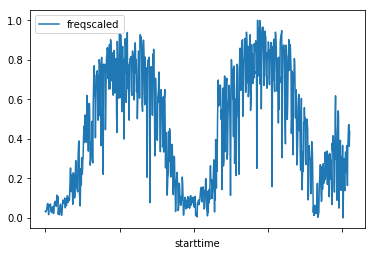

<Figure size 432x288 with 0 Axes>

In [119]:
data.plot(x='starttime',y='freqscaled')
plt.show()
plt.savefig('C:/Users/Davor/Desktop/ARIMA_DEMO.png')

In [123]:
def Change_Dtypes(data):
    data['Date']=pd.to_datetime(data['starttime'],errors='coerce')
    return data
Change_Dtypes(data)

Unnamed: 0   starttime  freq  freqscaled  Year  Month  Day  \
0             0  2016-01-01   241    0.032546  2016      1    1   
1             1  2016-01-02   220    0.029710  2016      1    2   
2             2  2016-01-03   245    0.033086  2016      1    3   
3             3  2016-01-04   276    0.037272  2016      1    4   
4             4  2016-01-05   325    0.043889  2016      1    5   
5             5  2016-01-06   459    0.061985  2016      1    6   
6             6  2016-01-07   533    0.071978  2016      1    7   
7             7  2016-01-08   537    0.072519  2016      1    8   
8             8  2016-01-09   327    0.044159  2016      1    9   
9             9  2016-01-10   121    0.016340  2016      1   10   
10           10  2016-01-11   492    0.066442  2016      1   11   
11           11  2016-01-12   488    0.065901  2016      1   12   
12           12  2016-01-13   426    0.057529  2016      1   13   
13           13  2016-01-14   467    0.063065  2016      1   14   
14           14  2016-01-15   520    0.070223  2016      1   15   
15           15  2016-01-16   260    0.035111  2016      1   16   
16           16  2016-01-17   267    0.036057  2016      1   17   
17           17  2016-01-18   201    0.027144  2016      1   18   
18           18  2016-01-19   292    0.039433  2016      1   19   
19           19  2016-01-20   420    0.056718  2016      1   20   
20           20  2016-01-21   410    0.055368  2016      1   21   
21           21  2016-01-22   425    0.057394  2016      1   22   
22           22  2016-01-23   159    0.021472  2016      1   23   
23           23  2016-01-24   193    0.026063  2016      1   24   
24           24  2016-01-25   463    0.062525  2016      1   25   
25           25  2016-01-26   568    0.076705  2016      1   26   
26           26  2016-01-27   620    0.083727  2016      1   27   
27           27  2016-01-28   617    0.083322  2016      1   28   
28           28  2016-01-29   598    0.080756  2016      1   29   
29           29  2016-01-30   437    0.059014  2016      1   30   
..          ...         ...   ...         ...   ...    ...  ...   
791         791  2018-03-02   368    0.049696  2018      3    2   
792         792  2018-03-03  1424    0.192302  2018      3    3   
793         793  2018-03-04  1439    0.194328  2018      3    4   
794         794  2018-03-05  2518    0.340041  2018      3    5   
795         795  2018-03-06  2910    0.392978  2018      3    6   
796         796  2018-03-07  1424    0.192302  2018      3    7   
797         797  2018-03-08  1032    0.139365  2018      3    8   
798         798  2018-03-09  2274    0.307090  2018      3    9   
799         799  2018-03-10  1261    0.170290  2018      3   10   
800         800  2018-03-11  1432    0.193383  2018      3   11   
801         801  2018-03-12  2719    0.367184  2018      3   12   
802         802  2018-03-13     0    0.000000  2018      3   13   
803         803  2018-03-14   713    0.096286  2018      3   14   
804         804  2018-03-15  2219    0.299662  2018      3   15   
805         805  2018-03-16  2222    0.300068  2018      3   16   
806         806  2018-03-17  1157    0.156246  2018      3   17   
807         807  2018-03-18  1022    0.138015  2018      3   18   
808         808  2018-03-19  2207    0.298042  2018      3   19   
809         809  2018-03-20  2466    0.333018  2018      3   20   
810         810  2018-03-21  2339    0.315868  2018      3   21   
811         811  2018-03-22  1724    0.232816  2018      3   22   
812         812  2018-03-23  2707    0.365564  2018      3   23   
813         813  2018-03-24  1749    0.236192  2018      3   24   
814         814  2018-03-25  1209    0.163268  2018      3   25   
815         815  2018-03-26  2689    0.363133  2018      3   26   
816         816  2018-03-27  2985    0.403106  2018      3   27   
817         817  2018-03-28  3459    0.467117  2018      3   28   
818         818  2018-03-29  3496    0.472113  2018 

In [128]:
def test_stationarity(timeseries):
#     #Determing rolling statistics
#     rolmean = pd.rolling_mean(timeseries, window=12)
#     rolstd = pd.rolling_std(timeseries, window=12)

#     #Plot rolling statistics:
#     fig = plt.figure(figsize=(12, 8))
#     orig = plt.plot(timeseries, color='blue',label='Original')
#     mean = plt.plot(rolmean, color='red', label='Rolling Mean')
#     std = plt.plot(rolstd, color='black', label = 'Rolling Std')
#     plt.legend(loc='best')
#     plt.title('Rolling Mean & Standard Deviation')
#     plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
test_stationarity(data.freqscaled)

Results of Dickey-Fuller Test
Test Statistic                  -1.937745
p-value                          0.314518
#Lags Used                      17.000000
Number of Observations Used    803.000000
Critical Value (1%)             -3.438520
Critical Value (5%)             -2.865146
Critical Value (10%)            -2.568690
dtype: float64


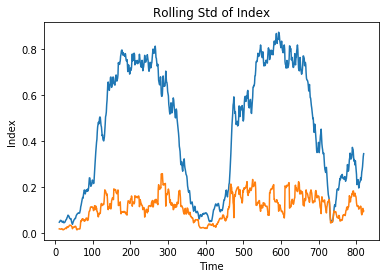

In [130]:
def Plot_rolling_stats(value):
    #test_stationarity(data.value)
    var_index = value.rolling(12).std()
    mean_index = value.rolling(12).mean()
    mean_index.plot()
    plt.title("Rolling Mean of Index")
    plt.xlabel("Time")
    plt.ylabel("Index")
    var_index.plot()
    plt.title("Rolling Std of Index")
    plt.xlabel("Time")
    plt.ylabel("Index")
Plot_rolling_stats(data.freqscaled)

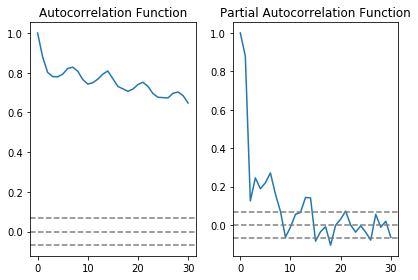

In [132]:
def Plot_ACF_PACF(value):
    lag_acf = acf(value, nlags=30)
    lag_pacf = pacf(value, nlags=30, method='ols')
    plt.subplot(121) 
    plt.plot(lag_acf)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(value)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(value,)),linestyle='--',color='gray')
    plt.title('Autocorrelation Function')
    plt.subplot(122)
    plt.plot(lag_pacf)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(value)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(value)),linestyle='--',color='gray')
    plt.title('Partial Autocorrelation Function')
    plt.tight_layout()
Plot_ACF_PACF(data.freqscaled)

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this 

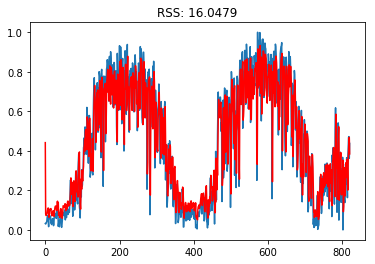

In [134]:
def build_ARIMA_model(value):
    model = ARIMA(np.array(value), order=(2,0,0))
    results_AR = model.fit(disp=-1)
    plt.plot(value)
    plt.plot(results_AR.fittedvalues, color='red')
    plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-value)**2))
    return results_AR.fittedvalues,value
pred,true=build_ARIMA_model(data.freqscaled)

In [135]:
def Find_RMSE_MAE(x,x1,i):
        if i==1:
            return math.sqrt(mean_squared_error(x, x1))
        else:
            return mean_absolute_error(x, x1)
# calculate root mean squared error
trerr= Find_RMSE_MAE(true,pred,1)
print('Train Score: %.2f RMSE' %(trerr))
# calculate mean absloute error
meanerrtr = Find_RMSE_MAE(true,pred,0)
print ('Train Score: %.2f MAE' %(meanerrtr))

Train Score: 0.14 RMSE
Train Score: 0.10 MAE


# END ARIMA

In [95]:
from theano.tensor.signal.pool import pool_2d

import lasagne
import theano
import time

import numpy as np
import cPickle as cp
import theano.tensor as T
from sliding_window import sliding_window

# Hardcoded number of sensor channels employed in the OPPORTUNITY challenge
NB_SENSOR_CHANNELS = 113

# Hardcoded number of classes in the gesture recognition problem
NUM_CLASSES = 18

# Hardcoded length of the sliding window mechanism employed to segment the data
SLIDING_WINDOW_LENGTH = 24

# Length of the input sequence after convolutional operations
FINAL_SEQUENCE_LENGTH = 8

# Hardcoded step of the sliding window mechanism employed to segment the data
SLIDING_WINDOW_STEP = 12

# Batch Size
BATCH_SIZE = 100

# Number filters convolutional layers
NUM_FILTERS = 64

# Size filters convolutional layers
FILTER_SIZE = 5

# Number of unit in the long short-term recurrent layers
NUM_UNITS_LSTM = 128

ImportError: cannot import name 'downsample'

In [97]:


assert NB_SENSOR_CHANNELS == X_train.shape[1]
def opp_sliding_window(data_x, data_y, ws, ss):
    data_x = sliding_window(data_x,(ws,data_x.shape[1]),(ss,1))
    data_y = np.asarray([[i[-1]] for i in sliding_window(data_y,ws,ss)])
    return data_x.astype(np.float32), data_y.reshape(len(data_y)).astype(np.uint8)

# Sensor data is segmented using a sliding window mechanism
X_test, y_test = opp_sliding_window(X_test, y_test, SLIDING_WINDOW_LENGTH, SLIDING_WINDOW_STEP)
print(" ..after sliding window (testing): inputs {0}, targets {1}".format(X_test.shape, y_test.shape))

# Data is reshaped since the input of the network is a 4 dimension tensor
X_test = X_test.reshape((-1, 1, SLIDING_WINDOW_LENGTH, NB_SENSOR_CHANNELS))

NameError: name 'NB_SENSOR_CHANNELS' is not defined

In [98]:
net = {}
net['input'] = lasagne.layers.InputLayer((BATCH_SIZE, 1, SLIDING_WINDOW_LENGTH, NB_SENSOR_CHANNELS))
net['conv1/5x1'] = lasagne.layers.Conv2DLayer(net['input'], NUM_FILTERS, (FILTER_SIZE, 1))
net['conv2/5x1'] = lasagne.layers.Conv2DLayer(net['conv1/5x1'], NUM_FILTERS, (FILTER_SIZE, 1))
net['conv3/5x1'] = lasagne.layers.Conv2DLayer(net['conv2/5x1'], NUM_FILTERS, (FILTER_SIZE, 1))
net['conv4/5x1'] = lasagne.layers.Conv2DLayer(net['conv3/5x1'], NUM_FILTERS, (FILTER_SIZE, 1))
net['shuff'] = lasagne.layers.DimshuffleLayer(net['conv4/5x1'], (0, 2, 1, 3))
net['lstm1'] = lasagne.layers.LSTMLayer(net['shuff'], NUM_UNITS_LSTM)
net['lstm2'] = lasagne.layers.LSTMLayer(net['lstm1'], NUM_UNITS_LSTM)
# In order to connect a recurrent layer to a dense layer, it is necessary to flatten the first two dimensions
# to cause each time step of each sequence to be processed independently (see Lasagne docs for further information)
net['shp1'] = lasagne.layers.ReshapeLayer(net['lstm2'], (-1, NUM_UNITS_LSTM))
net['prob'] = lasagne.layers.DenseLayer(net['shp1'],NUM_CLASSES, nonlinearity=lasagne.nonlinearities.softmax)
# Tensors reshaped back to the original shape
net['shp2'] = lasagne.layers.ReshapeLayer(net['prob'], (BATCH_SIZE, FINAL_SEQUENCE_LENGTH, NUM_CLASSES))
# Last sample in the sequence is considered
net['output'] = lasagne.layers.SliceLayer(net['shp2'], -1, 1)

NameError: name 'lasagne' is not defined

In [99]:
# The model is populated with the weights of the pretrained network
all_params_values = cp.load(open('weights/DeepConvLSTM_oppChallenge_gestures.pkl'))
lasagne.layers.set_all_param_values(net['output'], all_params_values)

NameError: name 'cp' is not defined

In [ ]:
 Compilation of theano functions
# Obtaining the probability distribution over classes
test_prediction = lasagne.layers.get_output(net['output'], deterministic=True)
# Returning the predicted output for the given minibatch
test_fn =  theano.function([ net['input'].input_var], [T.argmax(test_prediction, axis=1)])

In [ ]:
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.arange(len(inputs))
        np.random.shuffle(indices)
    for start_idx in range(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]
        
# Classification of the testing data
print("Processing {0} instances in mini-batches of {1}".format(X_test.shape[0],BATCH_SIZE))
test_pred = np.empty((0))
test_true = np.empty((0))
start_time = time.time()
for batch in iterate_minibatches(X_test, y_test, BATCH_SIZE):
    inputs, targets = batch
    y_pred, = test_fn(inputs)
    test_pred = np.append(test_pred, y_pred, axis=0)
    test_true = np.append(test_true, targets, axis=0)

In [ ]:
# Results presentation
print("||Results||")
print("\tTook {:.3f}s.".format( time.time() - start_time))
import sklearn.metrics as metrics
print("\tTest fscore:\t{:.4f} ".format(metrics.f1_score(test_true, test_pred, average='weighted')))

In [127]:
%reset
%matplotlib inline

import matplotlib.pyplot as plt

import sys
from time import time

import numpy as np
import tensorflow.contrib.slim as slim
from tensorflow.python.ops.rnn import dynamic_rnn

from data_gen import next_batch
from md_lstm import *

Once deleted, variables cannot be recovered. Proceed (y/[n])? n
Nothing done.


ModuleNotFoundError: No module named 'data_gen'

In [141]:
#keras stuff now
import os
import csv
import codecs
from keras.layers import LSTM, Convolution1D,Convolution2D, Flatten, Dropout, Dense, Input, Conv1D, GRU, GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from keras.models import Sequential
from keras.layers import merge, concatenate
from keras.models import Model
from keras.layers.normalization import BatchNormalization
from keras import backend as K
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Conv1D, MaxPooling1D, Embedding
#Using Pretrained Embedding Matrix

In [142]:
def getjmodel():
    inp = Input(shape=(length,))
    x = Embedding(nb_words, vector_length, weights=[embedding_matrix])(inp)
    x = Conv1D(256, 3, activation='relu')(x)
    x = Bidirectional(LSTM(50, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))(x)
    x = GlobalMaxPooling1D()(x)
    x = Dense(50, activation="relu")(x)
    x = Dropout(0.1)(x)
    x = Dense(6, activation="sigmoid")(x)
    model = Model(inputs=inp, outputs=x)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [143]:
labels=train[['freqscaled','Year', 'Month','threat','Day', 'Low Temp' ]]
data_train, data_test, y_train, y_test, comm_train, comm_trst =train_test_split(data, np.array(labels),train.comment_text, test_size=0.20, random_state=22)

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [148]:
galaxyModel=getjmodel()
galaxyModel.fit(train_X, train_Y, 2048, epochs=3, validation_data=(data_test, y_test))

NameError: name 'length' is not defined

In [153]:
# Save the last 21 days 
test_data = data[-21*24:]
real_data = data[:-21*24]

In [154]:
# Separate the data into features and targets
target_fields = ['cnt', 'casual', 'registered']
features, targets = data.drop(target_fields, axis=1), data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

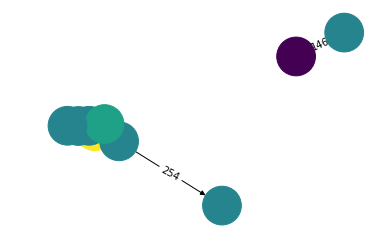

In [14]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab

G = nx.DiGraph()

G.add_edges_from([('A', 'B')], weight=447)
G.add_edges_from([('A','C')], weight=365)
G.add_edges_from([('A','E')], weight=850)

#G.add_edges_from([('B', 'A')], weight=338)
#G.add_edges_from([('B','C')], weight=2383)
G.add_edges_from([('B','E')], weight=717)

G.add_edges_from([('C', 'A')], weight=749)
G.add_edges_from([('C','B')], weight=1680)
G.add_edges_from([('C','D')], weight=1798)
G.add_edges_from([('C', 'E'),('C','G')], weight=254)

#G.add_edges_from([('D', 'C')], weight=2801)
G.add_edges_from([('D','E')], weight=608)

#G.add_edges_from([('E', 'A')], weight=1428)
#G.add_edges_from([('E','B')], weight=475)
#G.add_edges_from([('E','C')], weight=157)
#G.add_edges_from([('E','D')], weight=867)
G.add_edges_from([('E','F')], weight=762)

#G.add_edges_from([('F','E')], weight=668)

#G.add_edges_from([('G','C')], weight=215)

G.add_edges_from([('H','I')], weight=146)

#G.add_edges_from([('I','H')], weight=465)


val_map = {'A': 1.0,
                   'D': 0.5714285714285714,
                              'H': 0.0}

values = [val_map.get(node, 0.45) for node in G.nodes()]
edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])
#red_edges = [('C','D'),('D','A')]
edge_colors = ['black' if not edge in red_edges else 'red' for edge in G.edges()]

pos=nx.spring_layout(G)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw(G,pos, node_color = values, node_size=1500,edge_color=edge_colors,edge_cmap=plt.cm.Reds)
pylab.show()

In [29]:
from graphviz import Digraph

dot = Digraph()
dot.node('A', 'A')
dot.node('B', 'B')
dot.node('C', 'C')
dot.edges(['AB', 'AB', 'AB', 'BC', 'BA', 'CB'])

print(dot.source)
#dot.render(file_name, view=True)

digraph {
	A [label=A]
	B [label=B]
	C [label=C]
	A -> B
	A -> B
	A -> B
	B -> C
	B -> A
	C -> B
}


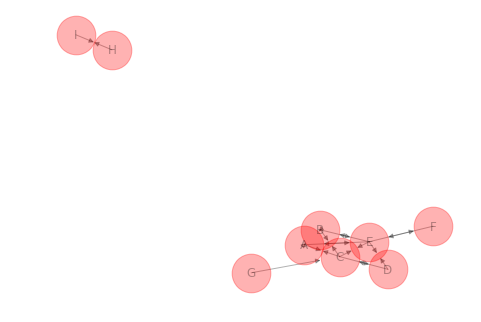

In [47]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
 
# ------- DIRECTED
 
# Build a dataframe with your connections
# This time a pair can appear 2 times, in one side or in the other!
df = pd.DataFrame({ 'from':['A', 'A', 'A', 'B','B', 'B', 'C', 'C', 'C','C', 'D', 'D', 'E', 'E','E', 'E', 'E', 'F', 'G','H', 'I'], 'to':['B', 'C', 'E', 'A','C', 'E', 'A', 'B', 'D','E', 'C', 'E', 'A', 'B','C', 'D', 'F', 'E', 'C','I', 'H'],
                  'weight':[447, 365, 850, 338, 2383, 717, 749, 1680, 1798, 254, 2801, 608, 1428, 475, 157, 867, 762, 668, 215, 146, 465]})
df
 
# Build your graph. Note that we use the DiGraph function to create the graph!
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.DiGraph() )
 
# Make the graph
nx.draw(G, with_labels=True, node_size=1500, alpha=0.3, arrows=True)

In [45]:
df

from to  weight
0     A  B     447
1     A  C     365
2     A  E     850
3     B  A     338
4     B  C    2383
5     B  E     717
6     C  A     749
7     C  B    1680
8     C  D    1798
9     C  E     254
10    D  C    2801
11    D  E     608
12    E  A    1428
13    E  B     475
14    E  C     157
15    E  D     867
16    E  F     762
17    F  E     668
18    G  C     215
19    H  I     146
20    I  H     465

In [55]:
import torch.utils.data as utils
import torch.nn.functional as F
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.nn.parameter import Parameter
import numpy as np
import pandas as pd
import math
import time

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
print(torch.__version__)

1.1.0


In [59]:
def PrepareDataset(speed_matrix, BATCH_SIZE = 40, seq_len = 10, pred_len = 1, train_propotion = 0.7, valid_propotion = 0.2):
    """ Prepare training and testing datasets and dataloaders.
    
    Convert speed/volume/occupancy matrix to training and testing dataset. 
    The vertical axis of speed_matrix is the time axis and the horizontal axis 
    is the spatial axis.
    
    Args:
        speed_matrix: a Matrix containing spatial-temporal speed data for a network
        seq_len: length of input sequence
        pred_len: length of predicted sequence
    Returns:
        Training dataloader
        Testing dataloader
    """
    time_len = speed_matrix.shape[0]
    
    max_speed = speed_matrix.max().max()
    speed_matrix =  speed_matrix / max_speed
    
    speed_sequences, speed_labels = [], []
    for i in range(time_len - seq_len - pred_len):
        speed_sequences.append(speed_matrix.iloc[i:i+seq_len].values)
        speed_labels.append(speed_matrix.iloc[i+seq_len:i+seq_len+pred_len].values)
    speed_sequences, speed_labels = np.asarray(speed_sequences), np.asarray(speed_labels)
    
    # shuffle and split the dataset to training and testing datasets
    sample_size = speed_sequences.shape[0]
    index = np.arange(sample_size, dtype = int)
    np.random.shuffle(index)
    
    train_index = int(np.floor(sample_size * train_propotion))
    valid_index = int(np.floor(sample_size * ( train_propotion + valid_propotion)))
    
    train_data, train_label = speed_sequences[:train_index], speed_labels[:train_index]
    valid_data, valid_label = speed_sequences[train_index:valid_index], speed_labels[train_index:valid_index]
    test_data, test_label = speed_sequences[valid_index:], speed_labels[valid_index:]
    
    train_data, train_label = torch.Tensor(train_data), torch.Tensor(train_label)
    valid_data, valid_label = torch.Tensor(valid_data), torch.Tensor(valid_label)
    test_data, test_label = torch.Tensor(test_data), torch.Tensor(test_label)
    
    train_dataset = utils.TensorDataset(train_data, train_label)
    valid_dataset = utils.TensorDataset(valid_data, valid_label)
    test_dataset = utils.TensorDataset(test_data, test_label)
    
    train_dataloader = utils.DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle=True, drop_last = True)
    valid_dataloader = utils.DataLoader(valid_dataset, batch_size = BATCH_SIZE, shuffle=True, drop_last = True)
    test_dataloader = utils.DataLoader(test_dataset, batch_size = BATCH_SIZE, shuffle=True, drop_last = True)
    
    return train_dataloader, valid_dataloader, test_dataloader, max_speed

In [78]:
speed_matrix = pd.read_csv("./matrica.csv")

In [79]:
speed_matrix

0     447     365       0    850  \
0                                     338     0.0  2383.0     0.0  717.0   
1                                     749  1680.0     0.0  1798.0  254.0   
2                                       0     0.0  2801.0     0.0  608.0   
3  1428, 475, 157, 867, 0, 762, 0, 0, 0\n     NaN     NaN     NaN    NaN   
4                                       0     0.0     0.0     0.0  668.0   
5           0, 0, 215, 0, 0, 0, 0, 0, 0\n     NaN     NaN     NaN    NaN   
6           0, 0, 0, 0, 0, 0, 0, 0, 146\n     NaN     NaN     NaN    NaN   
7           0, 0, 0, 0, 0, 0, 0, 465, 0\n     NaN     NaN     NaN    NaN   

    0.1    0.2   0.3   0.4  
0   0.0    0.0   0.0   0.0  
1   0.0  254.0   0.0   0.0  
2   0.0    0.0   0.0   0.0  
3   NaN    NaN   NaN   NaN  
4   0.0    0.0   0.0   0.0  
5   NaN    NaN   NaN   NaN  
6   NaN    NaN   NaN   NaN  
7   NaN    NaN   NaN   NaN

In [77]:
train_dataloader, valid_dataloader, test_dataloader, max_speed = PrepareDataset(speed_matrix)

TypeError: Could not operate '749;1680;0;1798;254;0;254;0;0' with block values unsupported operand type(s) for /: 'str' and 'str'

In [90]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G = nx.DiGraph()
#G.add_edge(1, 2, weight = 50)
#G.add_edge(1, 3, weight = 30)
#G.add_edge(3, 1, weight = 300)
#G.add_edge(3, 2, weight = 10)
#G.add_edge(2, 4, weight = 20)
#G.add_edge(2, 5, weight = 30)
#G.add_edge(5, 3, weight = 5)
#G.add_edge(4, 5, weight = 10)

G.add_edge(1,2, weight=447)
G.add_edge(1,3, weight=365)
G.add_edge(1,5, weight=850)

G.add_edge(2,1, weight=338)
G.add_edge(2,3, weight=2383)
G.add_edge(2,5, weight=717)

G.add_edge(3,1, weight=749)
G.add_edge(3,2, weight=1680)
G.add_edge(3,4, weight=1798)
G.add_edge(3,5, weight=254)
G.add_edge(3,7, weight=254)


G.add_edge(4,5, weight=2801)
G.add_edge(4,5, weight=608)

G.add_edge(5,1, weight=1428)
G.add_edge(5,2, weight=475)
G.add_edge(5,3, weight=157)
G.add_edge(5,4, weight=867)
G.add_edge(5,6, weight=762)

G.add_edge(6,5, weight=668)

G.add_edge(7,3, weight=215)

G.add_edge(8,9, weight=146)

G.add_edge(9,8, weight=465)

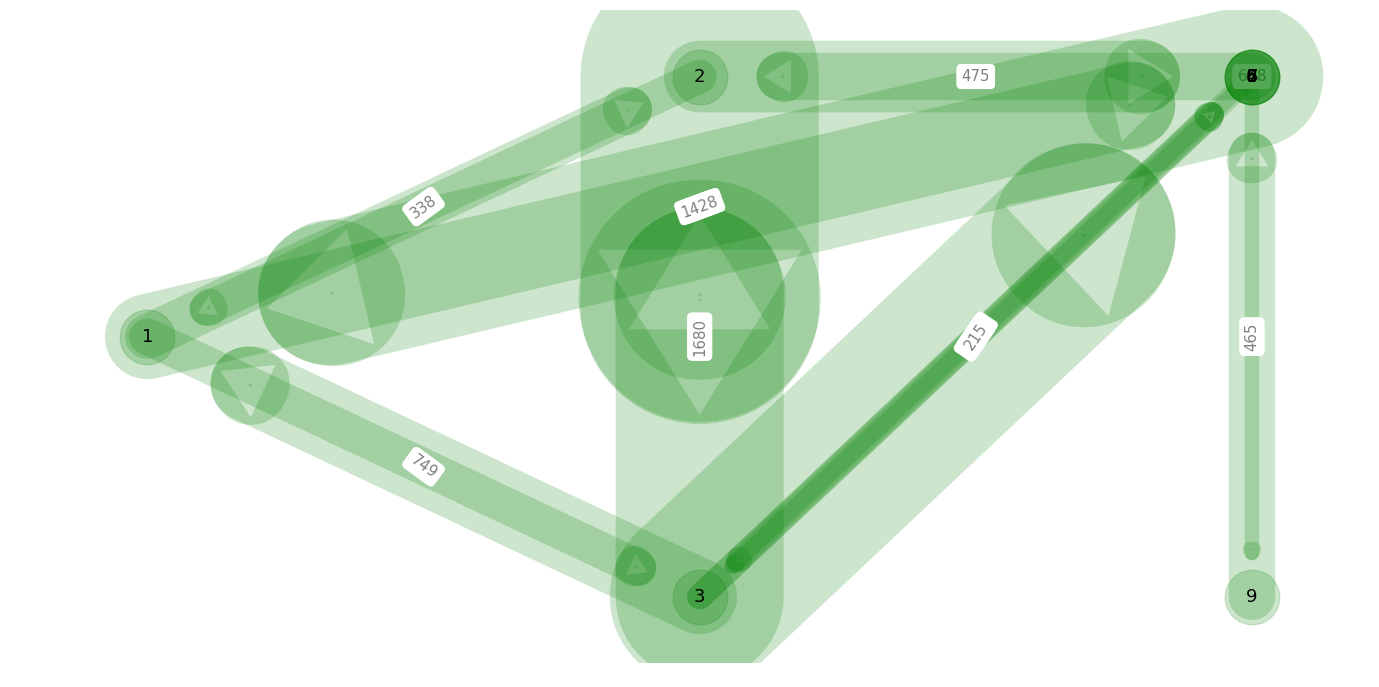

In [94]:
ig = plt.figure(figsize=(24, 12),facecolor='white')     
pos={1: np.array([ 0.2,  0.5]),
 2: np.array([ 0.4,  0.8]),
 3: np.array([ 0.4,  0.2 ]),
 4: np.array([ 0.6,  0.8]),
 5: np.array([ 0.6,  0.8]),
 6: np.array([ 0.6,  0.8]),
 7: np.array([ 0.6,  0.8]),
 8: np.array([ 0.6,  0.8]),
 9: np.array([ 0.6,  0.2])}

width=[float(d['weight']*.1) for (u,v,d) in G.edges(data=True)]
edge_labels=dict([((u,v,),d['weight']) for u,v,d in G.edges(data=True)])
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels, font_size = 15,alpha = .5)
nx.draw(G, pos, node_size = 3000, node_color = 'green',
        alpha = 0.2, width = width, edge_color='green',style='solid')
nx.draw_networkx_labels(G,pos,font_size=18)
plt.show()

In [100]:
def hub_matrix(G,nodelist=None):
    """Return the HITS hub matrix."""
    M=nx.to_numpy_matrix(G,nodelist=nodelist)
    return M*M.T

def authority_matrix(G,nodelist=None):
    """Return the HITS authority matrix."""
    M=nx.to_numpy_matrix(G,nodelist=nodelist)
    return M.T*M

def hits_numpy(G,normalized=True):
    """Return HITS hubs and authorities values for nodes.

    The HITS algorithm computes two numbers for a node.
    Authorities estimates the node value based on the incoming links.
    Hubs estimates the node value based on outgoing links.

    Parameters
    ----------
    G : graph
      A NetworkX graph

    normalized : bool (default=True)
       Normalize results by the sum of all of the values.

    Returns
    -------
    (hubs,authorities) : two-tuple of dictionaries
       Two dictionaries keyed by node containing the hub and authority
       values.

    Examples
    --------
    >>> G=nx.path_graph(4)
    >>> h,a=nx.hits(G)

    Notes
    -----
    The eigenvector calculation uses NumPy's interface to LAPACK.

    The HITS algorithm was designed for directed graphs but this
    algorithm does not check if the input graph is directed and will
    execute on undirected graphs.

    References
    ----------
    .. [1] A. Langville and C. Meyer,
       "A survey of eigenvector methods of web information retrieval."
       http://citeseer.ist.psu.edu/713792.html
    .. [2] Jon Kleinberg,
       Authoritative sources in a hyperlinked environment
       Journal of the ACM 46 (5): 604-32, 1999.
       doi:10.1145/324133.324140.
       http://www.cs.cornell.edu/home/kleinber/auth.pdf.
    """
    try:
        import numpy as np
    except ImportError:
        raise ImportError(\
            "hits_numpy() requires NumPy: http://scipy.org/")
    if len(G) == 0:
        return {},{}

    H=nx.hub_matrix(G,G.nodes())
    e,ev=np.linalg.eig(H)
    m=e.argsort()[-1] # index of maximum eigenvalue
    h=np.array(ev[:,m]).flatten()
    A=nx.authority_matrix(G,G.nodes())
    e,ev=np.linalg.eig(A)
    m=e.argsort()[-1] # index of maximum eigenvalue
    a=np.array(ev[:,m]).flatten()
    if normalized:
        h = h/h.sum()
        a = a/a.sum()
    else:
        h = h/h.max()
        a = a/a.max()
    hubs=dict(zip(G.nodes(),map(float,h)))
    authorities=dict(zip(G.nodes(),map(float,a)))
    return hubs,authorities

In [101]:
M = nx.to_numpy_matrix(G)
M

matrix([[   0.,  447.,  365.,  850.,    0.,    0.,    0.,    0.,    0.],
        [ 338.,    0., 2383.,  717.,    0.,    0.,    0.,    0.,    0.],
        [ 749., 1680.,    0.,  254., 1798.,  254.,    0.,    0.,    0.],
        [1428.,  475.,  157.,    0.,  867.,    0.,  762.,    0.,    0.],
        [   0.,    0.,    0.,  608.,    0.,    0.,    0.,    0.,    0.],
        [   0.,    0.,  215.,    0.,    0.,    0.,    0.,    0.,    0.],
        [   0.,    0.,    0.,  668.,    0.,    0.,    0.,    0.,    0.],
        [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  146.],
        [   0.,    0.,    0.,    0.,    0.,    0.,    0.,  465.,    0.]])

In [102]:
M.T

matrix([[   0.,  338.,  749., 1428.,    0.,    0.,    0.,    0.,    0.],
        [ 447.,    0., 1680.,  475.,    0.,    0.,    0.,    0.,    0.],
        [ 365., 2383.,    0.,  157.,    0.,  215.,    0.,    0.,    0.],
        [ 850.,  717.,  254.,    0.,  608.,    0.,  668.,    0.,    0.],
        [   0.,    0., 1798.,  867.,    0.,    0.,    0.,    0.,    0.],
        [   0.,    0.,  254.,    0.,    0.,    0.,    0.,    0.,    0.],
        [   0.,    0.,    0.,  762.,    0.,    0.,    0.,    0.,    0.],
        [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  465.],
        [   0.,    0.,    0.,    0.,    0.,    0.,    0.,  146.,    0.]])

In [103]:
M*(M.T)

matrix([[1055534., 1479245.,  966860.,  269630.,  516800.,   78475.,
          567800.,       0.,       0.],
        [1479245., 6307022.,  435280.,  856795.,  435936.,  512345.,
          478956.,       0.,       0.],
        [ 966860.,  435280., 6745237., 3426438.,  154432.,       0.,
          169672.,       0.,       0.],
        [ 269630.,  856795., 3426438., 3621791.,       0.,   33755.,
               0.,       0.,       0.],
        [ 516800.,  435936.,  154432.,       0.,  369664.,       0.,
          406144.,       0.,       0.],
        [  78475.,  512345.,       0.,   33755.,       0.,   46225.,
               0.,       0.,       0.],
        [ 567800.,  478956.,  169672.,       0.,  406144.,       0.,
          446224.,       0.,       0.],
        [      0.,       0.,       0.,       0.,       0.,       0.,
               0.,   21316.,       0.],
        [      0.,       0.,       0.,       0.,       0.,       0.,
               0.,       0.,  216225.]])

In [104]:
M = nx.to_numpy_matrix(G)
H=M*M.T
H


matrix([[1055534., 1479245.,  966860.,  269630.,  516800.,   78475.,
          567800.,       0.,       0.],
        [1479245., 6307022.,  435280.,  856795.,  435936.,  512345.,
          478956.,       0.,       0.],
        [ 966860.,  435280., 6745237., 3426438.,  154432.,       0.,
          169672.,       0.,       0.],
        [ 269630.,  856795., 3426438., 3621791.,       0.,   33755.,
               0.,       0.,       0.],
        [ 516800.,  435936.,  154432.,       0.,  369664.,       0.,
          406144.,       0.,       0.],
        [  78475.,  512345.,       0.,   33755.,       0.,   46225.,
               0.,       0.,       0.],
        [ 567800.,  478956.,  169672.,       0.,  406144.,       0.,
          446224.,       0.,       0.],
        [      0.,       0.,       0.,       0.,       0.,       0.,
               0.,   21316.,       0.],
        [      0.,       0.,       0.,       0.,       0.,       0.,
               0.,       0.,  216225.]])

In [107]:
# Compute the eigenvalues and right eigenvectors of a square array.
e,ev=np.linalg.eig(H)
print (e)
print (ev)

[9.44826277e+06 6.43805591e+06 1.73162410e+06 9.15491298e+05
 5.79605470e+04 3.02373395e+02 3.52596476e-11 2.13160000e+04
 2.16225000e+05]
[[-1.70950388e-01 -1.91516914e-01  4.66363855e-01 -3.81983302e-01
   7.55439652e-01 -1.29644138e-03 -6.65017568e-16  0.00000000e+00
   0.00000000e+00]
 [-3.42172048e-01 -8.92828495e-01 -1.11968590e-01  2.24619700e-01
  -1.21232335e-01 -8.99294966e-02  1.55375667e-14  0.00000000e+00
   0.00000000e+00]
 [-7.67781635e-01  3.56702799e-01  3.69448968e-01  3.60711087e-01
  -1.29006581e-01 -5.17187068e-03  8.89221179e-16  0.00000000e+00
   0.00000000e+00]
 [-5.09872920e-01  1.43147321e-01 -6.85032883e-01 -4.90734505e-01
   9.57010953e-02  1.70101629e-02 -2.79432291e-15  0.00000000e+00
   0.00000000e+00]
 [-4.12496372e-02 -7.70353544e-02  2.72196808e-01 -4.39582051e-01
  -4.19088829e-01  4.98687163e-02 -7.39539184e-01  0.00000000e+00
   0.00000000e+00]
 [-2.19033613e-02 -7.31611292e-02 -2.60424539e-02  7.88502873e-02
   3.41472333e-02  9.93028741e-01 -1.687

In [108]:
m=e.argsort()[-1] # index of maximum eigenvalue
m

0

In [109]:
h=np.array(ev[:,m]).flatten()
h

array([-0.17095039, -0.34217205, -0.76778163, -0.50987292, -0.04124964,
       -0.02190336, -0.04532033,  0.        ,  0.        ])

In [110]:
A=M.T*M
A

matrix([[2714429., 1936620., 1029650.,  432592., 2584778.,  190246.,
         1088136.,       0.,       0.],
        [1936620., 3247834.,  237730.,  806670., 3432465.,  426720.,
          361950.,       0.,       0.],
        [1029650.,  237730., 5882788., 2018861.,  136119.,       0.,
          119634.,       0.,       0.],
        [ 432592.,  806670., 2018861., 2116993.,  456692.,   64516.,
               0.,       0.,       0.],
        [2584778., 3432465.,  136119.,  456692., 3984493.,  456692.,
          660654.,       0.,       0.],
        [ 190246.,  426720.,       0.,   64516.,  456692.,   64516.,
               0.,       0.,       0.],
        [1088136.,  361950.,  119634.,       0.,  660654.,       0.,
          580644.,       0.,       0.],
        [      0.,       0.,       0.,       0.,       0.,       0.,
               0.,  216225.,       0.],
        [      0.,       0.,       0.,       0.,       0.,       0.,
               0.,       0.,   21316.]])

In [111]:
e,ev=np.linalg.eig(A)
m=e.argsort()[-1] # index of maximum eigenvalue
a=np.array(ev[:,m]).flatten()
a

array([0.46158498, 0.52328591, 0.31314702, 0.20854152, 0.59292395,
       0.06344472, 0.12639821, 0.        , 0.        ])

In [112]:
normalized = True
if normalized:
    h = h/h.sum()
    a = a/a.sum()
else:
    h = h/h.max()
    a = a/a.max()
a, h

(array([0.20162481, 0.22857637, 0.13678567, 0.09109296, 0.25899495,
        0.02771327, 0.05521197, 0.        , 0.        ]),
 array([ 0.0900094 ,  0.18016164,  0.4042551 ,  0.26846009,  0.02171891,
         0.01153264,  0.02386222, -0.        , -0.        ]))

In [114]:
hubs=dict(zip(G.nodes(),map(float,h)))
authorities=dict(zip(G.nodes(),map(float,a)))
print (hubs)
print (authorities)

{1: 0.09000940347126558, 2: 0.18016163817575787, 3: 0.40425510494318523, 5: 0.26846009495842243, 4: 0.021718905059045907, 7: 0.011532635334029047, 6: 0.023862218058293874, 8: -0.0, 9: -0.0}
{1: 0.20162480810454125, 2: 0.22857637435267153, 3: 0.13678566629346414, 5: 0.09109296496423185, 4: 0.2589949479405883, 7: 0.027713268983000718, 6: 0.055211969361502244, 8: 0.0, 9: 0.0}


In [115]:
hits_numpy(G)

({1: 0.09000940347126558,
  2: 0.18016163817575787,
  3: 0.40425510494318523,
  5: 0.26846009495842243,
  4: 0.021718905059045907,
  7: 0.011532635334029047,
  6: 0.023862218058293874,
  8: -0.0,
  9: -0.0},
 {1: 0.20162480810454125,
  2: 0.22857637435267153,
  3: 0.13678566629346414,
  5: 0.09109296496423185,
  4: 0.2589949479405883,
  7: 0.027713268983000718,
  6: 0.055211969361502244,
  8: 0.0,
  9: 0.0})